table deleted


<IPython.core.display.Javascript object>


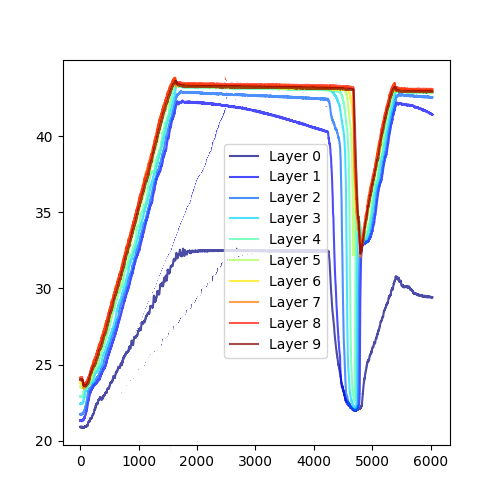

<IPython.core.display.Javascript object>


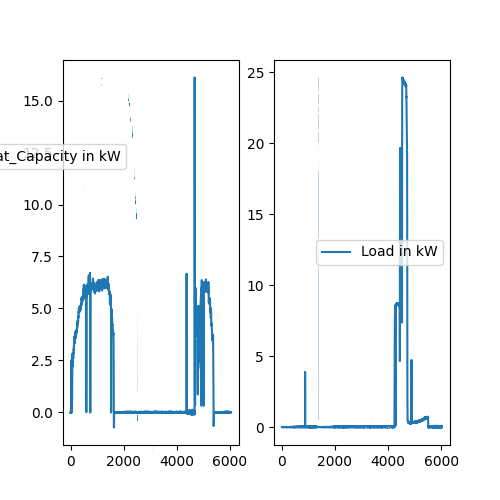

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 7.08680353773717e-06
heat Capacity in kWh is:  -2.4558448299848915e-06
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 1.417360707547434e-05
heat Capacity in kWh is:  -4.911801958132855e-06
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 2.1260410613211513e-05
heat Capacity in kWh is:  -7.367646788117746e-06
________________________________________________________________
flow rates load is =  0.6340193487350078 0.00397703769122

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.00018060596008538491
heat Capacity in kWh is:  -0.00017468608106836902
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.00018769276362312208
heat Capacity in kWh is:  -0.0001771419258983539
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.8300253303628652 0.005199031195508081 231.01259721412677
Load in kWh is: 0.00019477956716085925
heat Capacity in kWh is:  0.0010587970387880162
________________________________________________________

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 0.0003501006220919966
heat Capacity in kWh is:  0.029518982182542418
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 0.0003612988606418333
heat Capacity in kWh is:  0.029623349480735386
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.00037652347367262394
heat Capacity in kWh is:  0.029675658387567153
________________________________________________________________
flow ra

________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  1.4500442518387402 0.009082644859622551 963.2336440294581
Load in kWh is: 0.0005210029514390807
heat Capacity in kWh is:  0.06661276947083544
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.0005279462593273021
heat Capacity in kWh is:  0.0705459761830778
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.4500442518387402 0.009082644859622551 963.2336440294581
Load in kWh is: 0.0005265944670245461
heat Capacity in kWh is:  0.07434635239808171
________________________________________________________________
flow rate

________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.0006868597027067743
heat Capacity in kWh is:  0.15204007039041648
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 0.0006938742792453361
heat Capacity in kWh is:  0.1557457119762484
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 0.0006938742792453361
heat Capacity in kWh is:  0.1557457119762484
________________________________________________________________
flow rates l

________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.4480441908017212 0.009070117073609277 960.8716406526343
Load in kWh is: 0.0007925479337214351
heat Capacity in kWh is:  0.24635269245695376
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 0.0007996344156978253
heat Capacity in kWh is:  0.25063325423049715
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.000806648992236387
heat Capacity in kWh is:  0.2549347578991101
________________________________________________________________
flow rates l

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.0009482327192919585
heat Capacity in kWh is:  0.36294706133756627
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.0009553906752066444
heat Capacity in kWh is:  0.3678383307005366
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 0.0009624770473264559
heat Capacity in kWh is:  0.3725896045182079
________________________________________________________________
flow rates loa

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.4480441908017212 0.009070117073609277 960.8716406526343
Load in kWh is: 0.0011288369163465922
heat Capacity in kWh is:  0.48950303664498285
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 0.001135994872261278
heat Capacity in kWh is:  0.4944121593974116
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.0011388552752304556
heat Capacity in kWh is:  0.4994378382153253
________________________________________________________________
flow rates lo

Load in kWh is: 0.0013086202611112539
heat Capacity in kWh is:  0.614474023593918
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.0013157063114969598
heat Capacity in kWh is:  0.6196043950811166
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.0013229358512065201
heat Capacity in kWh is:  0.6246826923260208
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 0.0013172313488127294
heat Capacity in kWh is:  0.6298009331915

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.0014860700534526608
heat Capacity in kWh is:  0.7570339375470471
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 0.0014933711769570955
heat Capacity in kWh is:  0.7624135478749186
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.4500442518387402 0.009082644859622551 963.2336440294581
Load in kWh is: 0.0014933711769570955
heat Capacity in kWh is:  0.7624135478749186
________________________________________________________________
flow rates l

________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.0016633563618793095
heat Capacity in kWh is:  0.8887791896944545
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 0.0016619218235864766
heat Capacity in kWh is:  0.8944725051301212
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.4480441908017212 0.009070117073609277 960.8716406526343
Load in kWh is: 0.0016649266490436872
heat Capacity in kWh is:  0.9001382260860717
________________________________________________________________
flow rates lo

Load in kWh is: 0.0018203395422395005
heat Capacity in kWh is:  1.0299215800525332
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  1.4500442518387402 0.009082644859622551 963.2336440294581
Load in kWh is: 0.001814126635935968
heat Capacity in kWh is:  1.0358619704498495
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.001822000641585773
heat Capacity in kWh is:  1.0419510942587034
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 0.0018204694607132125
heat Capacity in kWh is:  1.048010573133

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.002012217982246663
heat Capacity in kWh is:  1.184843754520419
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.002020737052288695
heat Capacity in kWh is:  1.1911803861918886
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.002029399689483169
heat Capacity in kWh is:  1.197569329162114
________________________________________________________________
flow rates load is 

________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.4500442518387402 0.009082644859622551 963.2336440294581
Load in kWh is: 0.002216500405662183
heat Capacity in kWh is:  1.3457116107443348
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.002236910096782089
heat Capacity in kWh is:  1.3526245953050542
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.0022516546510545363
heat Capacity in kWh is:  1.3595713178973148
________________________________________________________________
flow rates load i

________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.002453102882202419
heat Capacity in kWh is:  1.5193296806446126
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.00246298453272383
heat Capacity in kWh is:  1.5261911277423565
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.002472866183245241
heat Capacity in kWh is:  1.5330524200729445
________________________________________________________________
flow rates load is 

________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.4500442518387402 0.009082644859622551 963.2336440294581
Load in kWh is: 0.002694779172434216
heat Capacity in kWh is:  1.6904404685169003
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.002694779172434216
heat Capacity in kWh is:  1.6904404685169003
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.0027180192420553514
heat Capacity in kWh is:  1.6974243124899833
________________________________________________________________
flow rates load

________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.0029817426567388975
heat Capacity in kWh is:  1.8602985634417268
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.0029795619633480297
heat Capacity in kWh is:  1.86752740674975
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.0029795619633480297
heat Capacity in kWh is:  1.86752740674975
________________________________________________________________
flow rates load is 

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.0032125428424859136
heat Capacity in kWh is:  2.0355627290246083
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.00323892905494313
heat Capacity in kWh is:  2.0431771987855942
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.0032580237948937395
heat Capacity in kWh is:  2.0508102040912446
________________________________________________________________
flow rates load is 

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.0034940820600626093
heat Capacity in kWh is:  2.2179895496707283
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.003514550913534302
heat Capacity in kWh is:  2.2255862576874472
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.0035428246614287676
heat Capacity in kWh is:  2.2331485655467294
________________________________________________________________
flow rates load i

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.0038318574008612515
heat Capacity in kWh is:  2.3994158876296305
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.4500442518387402 0.009082644859622551 963.2336440294581
Load in kWh is: 0.0038292758641212503
heat Capacity in kWh is:  2.4070286524332967
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  1.4500442518387402 0.009082644859622551 963.2336440294581
Load in kWh is: 0.003818591999278017
heat Capacity in kWh is:  2.4147978861041044
________________________________________________________________
flow rates l

________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.004087556438636118
heat Capacity in kWh is:  2.597492562786942
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.004118346082689399
heat Capacity in kWh is:  2.6051807760483294
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.004132531187786885
heat Capacity in kWh is:  2.612936577426655
________________________________________________________________
flow rates load is =  0

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.4500442518387402 0.009082644859622551 963.2336440294581
Load in kWh is: 0.004471086403435784
heat Capacity in kWh is:  2.805469159186698
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.0044859164721132265
heat Capacity in kWh is:  2.813330147375502
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.0044859164721132265
heat Capacity in kWh is:  2.813330147375502
________________________________________________________________
flow rates load i

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.004814443583548317
heat Capacity in kWh is:  3.0094253437119995
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.004829990873943572
heat Capacity in kWh is:  3.0177583285536738
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.004845538164338827
heat Capacity in kWh is:  3.026091313395348
________________________________________________________________
flow rates load is

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 0.005221232766921796
heat Capacity in kWh is:  3.2181225906594366
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.005237496754680622
heat Capacity in kWh is:  3.226424630812434
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.005263459797100004
heat Capacity in kWh is:  3.234746118847617
________________________________________________________________
flow rates load is =

________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 0.00565072681974034
heat Capacity in kWh is:  3.431215283658624
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.0056676358299691644
heat Capacity in kWh is:  3.4392353004935963
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.005684472467833262
heat Capacity in kWh is:  3.439251028614177
________________________________________________________________
flow rates load is

________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.006147517600294237
heat Capacity in kWh is:  3.630285788754888
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.006175310040476178
heat Capacity in kWh is:  3.638201816331113
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.006203101559257853
heat Capacity in kWh is:  3.646065385040202
________________________________________________________________
flow rates load is =  0

________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.00665990223560805
heat Capacity in kWh is:  3.8433486131876817
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.006667218299000966
heat Capacity in kWh is:  3.851370544497464
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.006696151916658577
heat Capacity in kWh is:  3.859444937074566
________________________________________________________________
flow rates load is =  0

________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.007105105428452014
heat Capacity in kWh is:  4.053879744266569
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.007123729501519224
heat Capacity in kWh is:  4.062321984726907
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.007120140706334056
heat Capacity in kWh is:  4.0708693839112815
________________________________________________________________
flow rates load is 

________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.007504793660839478
heat Capacity in kWh is:  4.277662647743301
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.007523771913307786
heat Capacity in kWh is:  4.285601718359554
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.0075428219320101755
heat Capacity in kWh is:  4.293579752186527
________________________________________________________________
flow rates load is 

________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.008018884704949126
heat Capacity in kWh is:  4.502047596575286
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.008026600350062774
heat Capacity in kWh is:  4.510933921019586
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.00802293069791827
heat Capacity in kWh is:  4.5198506759501
________________________________________________________________
flow rates load is =  0.

________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 0.008346158213650316
heat Capacity in kWh is:  4.7221923838971245
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 0.008353900043352973
heat Capacity in kWh is:  4.730252773785294
________________________________________________________________
flow rates load is =  0.6400195318460646 0.004014675271898536 3.6902686728639007
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.008407391236353257
heat Capacity in kWh is:  4.738497746524834
________________________________________________________________
flow rates load is

________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 0.00879607660129842
heat Capacity in kWh is:  4.947790900048449
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.008838270944225325
heat Capacity in kWh is:  4.956280168563892
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.00888046528715223
heat Capacity in kWh is:  4.964769824813047
________________________________________________________________
flow rates load is =  0.

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.009363207432415102
heat Capacity in kWh is:  5.175566822755464
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.00937108818324039
heat Capacity in kWh is:  5.183932123973792
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.009390683617295644
heat Capacity in kWh is:  5.192265054292351
________________________________________________________________
flow rates load is =  0

________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 0.009766126377193225
heat Capacity in kWh is:  5.3845004848313165
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.009810500225423784
heat Capacity in kWh is:  5.392834953655801
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.00981869778979387
heat Capacity in kWh is:  5.401201794446017
________________________________________________________________
flow rates load is =  0

________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.01030874896587886
heat Capacity in kWh is:  5.607240250584197
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.010329988722667905
heat Capacity in kWh is:  5.615608093873327
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.010351228479456949
heat Capacity in kWh is:  5.623923479060377
________________________________________________________________
flow rates load is =  0

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.016365248912021853
heat Capacity in kWh is:  5.82680537342374
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.016360976209143053
heat Capacity in kWh is:  5.835416903563748
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.016383364375063887
heat Capacity in kWh is:  5.8439440608979
________________________________________________________________
flow rates load is =  

________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 0.016985867625811526
heat Capacity in kWh is:  6.052835055874436
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.017009403854467624
heat Capacity in kWh is:  6.060910101757477
________________________________________________________________
flow rates load is =  0.6400195318460646 0.004014675271898536 3.6902686728639007
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 0.017075249928478427
heat Capacity in kWh is:  6.069023995754291
________________________________________________________________
flow rates load is =  0.63201

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.017551139328055437
heat Capacity in kWh is:  6.263913022805615
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.01757589754050551
heat Capacity in kWh is:  6.272041906477224
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.017571126555146074
heat Capacity in kWh is:  6.2801514199430555
________________________________________________________________
flow rates load is = 

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.0180542668268311
heat Capacity in kWh is:  6.477063967822322
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.018079959839268026
heat Capacity in kWh is:  6.485372535670741
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.0180596866466668
heat Capacity in kWh is:  6.493568072376752
________________________________________________________________
flow rates load is =  0.6

________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.018637863737627096
heat Capacity in kWh is:  6.6917675604840685
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.018695615538189297
heat Capacity in kWh is:  6.700321157645688
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.018737889657060865
heat Capacity in kWh is:  6.708927666222688
________________________________________________________________
flow rates load is =  0.6

________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.019425779939640044
heat Capacity in kWh is:  6.920046233544258
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.019485416437680734
heat Capacity in kWh is:  6.928568809857413
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 0.019512614144869374
heat Capacity in kWh is:  6.937059406272571
________________________________________________________________
flow rates load is =  0

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.020180719180825486
heat Capacity in kWh is:  7.147848236785837
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.02019187035644413
heat Capacity in kWh is:  7.1561529067929435
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 0.020219640896825517
heat Capacity in kWh is:  7.164558520358643
________________________________________________________________
flow rates load is = 

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.020736094739525836
heat Capacity in kWh is:  7.378085935428397
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.020797764311489338
heat Capacity in kWh is:  7.386611158653081
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.020775514834823563
heat Capacity in kWh is:  7.395021766636407
________________________________________________________________
flow rates load is =  

________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.021196375179862878
heat Capacity in kWh is:  7.604673918773278
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.021241956099622452
heat Capacity in kWh is:  7.61323288507353
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.021270509283376152
heat Capacity in kWh is:  7.621844770006687
________________________________________________________________
flow rates load is =  0.

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 0.021850307933041206
heat Capacity in kWh is:  7.842156114740958
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 0.02187950327509778
heat Capacity in kWh is:  7.850569118927635
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.02194367704586342
heat Capacity in kWh is:  7.859202852585576
________________________________________________________________
flow rates load is =  0.63

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.022469326357790927
heat Capacity in kWh is:  8.076496267177438
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.022499019287588413
heat Capacity in kWh is:  8.08526790969942
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.02251106268931593
heat Capacity in kWh is:  8.093987343971804
________________________________________________________________
flow rates load is =  0.63

________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.023395753906514577
heat Capacity in kWh is:  8.315295446940306
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.023425871665424546
heat Capacity in kWh is:  8.323593022338052
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 0.023456060046841466
heat Capacity in kWh is:  8.33203670333272
________________________________________________________________
flow rates load is =  0.630

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.024159813798722587
heat Capacity in kWh is:  8.5393805738769
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.024190282412985594
heat Capacity in kWh is:  8.547890050581689
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.024257247975681788
heat Capacity in kWh is:  8.556473233520185
________________________________________________________________
flow rates load is =  0.

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.025021742947274498
heat Capacity in kWh is:  8.777000574339105
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 0.025052346100210683
heat Capacity in kWh is:  8.785552705241512
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.025082877707552957
heat Capacity in kWh is:  8.794010357524364
________________________________________________________________
flow rates load is =  0.6

________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 0.02569604386377389
heat Capacity in kWh is:  9.009567450447838
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 0.025761849649074416
heat Capacity in kWh is:  9.018034358211676
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.0257917882354008
heat Capacity in kWh is:  9.026407174800482
________________________________________________________________
flow rates load is =  0.634

________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.026292811367609196
heat Capacity in kWh is:  9.243111261161806
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 0.026348262620450095
heat Capacity in kWh is:  9.251664960367656
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 0.026373406170559558
heat Capacity in kWh is:  9.260239877600847
________________________________________________________________
flow rates load is =  0

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.026902025070631545
heat Capacity in kWh is:  9.471511686494187
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.026898747838519917
heat Capacity in kWh is:  9.480099002688181
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.026925324958535876
heat Capacity in kWh is:  9.488580239077427
________________________________________________________________
flow rates load is = 

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.027251037039829052
heat Capacity in kWh is:  9.702362135092676
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 0.02726240326962164
heat Capacity in kWh is:  9.710832106034998
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 0.027273627328294157
heat Capacity in kWh is:  9.71922810701373
________________________________________________________________
flow rates load is =  0.

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.027541404670655162
heat Capacity in kWh is:  9.930413199802095
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.02753976172505966
heat Capacity in kWh is:  9.93894817941712
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.02754821649173271
heat Capacity in kWh is:  9.947536196519241
________________________________________________________________
flow rates load is =  

________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.027743090896852552
heat Capacity in kWh is:  10.16521419437224
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.027750269748913862
heat Capacity in kWh is:  10.173919565756012
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.027757448600975173
heat Capacity in kWh is:  10.182699592651096
________________________________________________________________
flow rates load is

________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.02796721905510424
heat Capacity in kWh is:  10.400824912434285
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.02796594511465325
heat Capacity in kWh is:  10.409023785366049
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 0.027980286429552824
heat Capacity in kWh is:  10.417315643595227
________________________________________________________________
flow rates load is =  0.

________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.028116168347990654
heat Capacity in kWh is:  10.62653735568217
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.028122776011512727
heat Capacity in kWh is:  10.634597594608884
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.028121502759184767
heat Capacity in kWh is:  10.642671560458169
________________________________________________________________
flow rates load 

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.028304221472041535
heat Capacity in kWh is:  10.84236821391303
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.02831153068786233
heat Capacity in kWh is:  10.850322901022153
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 0.028327866179074606
heat Capacity in kWh is:  10.858296494818253
________________________________________________________________
flow rates load is =  0

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.028537749485588633
heat Capacity in kWh is:  11.04489503365585
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.028550200274157708
heat Capacity in kWh is:  11.052638350779624
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 0.028557929067239453
heat Capacity in kWh is:  11.060525772540029
________________________________________________________________
flow rates load is

________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.028778983280415994
heat Capacity in kWh is:  11.239287475416377
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.028787061243852843
heat Capacity in kWh is:  11.24613040320035
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.02879995618049285
heat Capacity in kWh is:  11.252903845265774
________________________________________________________________
flow rates load is 

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.029009140440850834
heat Capacity in kWh is:  11.42099706762519
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.029017073912713166
heat Capacity in kWh is:  11.42724129080583
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.029025077648985438
heat Capacity in kWh is:  11.433538420582396
________________________________________________________________
flow rates load is =  

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.029212466460877214
heat Capacity in kWh is:  11.585320037168534
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 0.029229547053272385
heat Capacity in kWh is:  11.591116847782258
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.029223345269561968
heat Capacity in kWh is:  11.5967660715425
________________________________________________________________
flow rates load is =  0.

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 0.029400065150500136
heat Capacity in kWh is:  11.733350262178524
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 0.029412495199015606
heat Capacity in kWh is:  11.738536820263498
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 0.02942014095430631
heat Capacity in kWh is:  11.74381469498467
________________________________________________________________
flow rates load is =  0

________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.0295763500399939
heat Capacity in kWh is:  11.80093715254347
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 0.029579948205940107
heat Capacity in kWh is:  11.799929596281208
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 0.029589003046191328
heat Capacity in kWh is:  11.798979745339487
________________________________________________________________
flow rates load is =  

Load in kWh is: 0.029822084855425597
heat Capacity in kWh is:  11.79712217329912
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0298320571263142
heat Capacity in kWh is:  11.797122223674508
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.029842099983064054
heat Capacity in kWh is:  11.797121760881097
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.029852072560900333
heat Capacity in kWh is:  11.797121811256

________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.030107098738249294
heat Capacity in kWh is:  11.797130016239905
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.0301230184785512
heat Capacity in kWh is:  11.797136736251712
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.030132920777473905
heat Capacity in kWh is:  11.797136004773703
________________________________________________________________
flow rates loa

________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.030382369667235398
heat Capacity in kWh is:  11.797157404712626
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.030392412213417846
heat Capacity in kWh is:  11.79716783337483
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.03040844364779912
heat Capacity in kWh is:  11.797166647755743
________________________________________________________________
flow rates load 

Load in kWh is: 0.030596683434222692
heat Capacity in kWh is:  11.797096014491865
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.03061901379265903
heat Capacity in kWh is:  11.797094677591344
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.03062912692832246
heat Capacity in kWh is:  11.797107423632669
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.030639381151407706
heat Capacity in kWh is:  11.797106036280

________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.030885737342348646
heat Capacity in kWh is:  11.797164612144924
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.030896203617346022
heat Capacity in kWh is:  11.797163199566588
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.0309066698923434
heat Capacity in kWh is:  11.797147396481378
________________________________________________________________
flow rates loa

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.031051538828917747
heat Capacity in kWh is:  11.797057217918491
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.031062217428518422
heat Capacity in kWh is:  11.797055704373022
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.031073036986242746
heat Capacity in kWh is:  11.797054241284016
________________________________________________________________
flow rate

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.031376054748776826
heat Capacity in kWh is:  11.797107948665312
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.031387369708468095
heat Capacity in kWh is:  11.79710635943515
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.031398684668159364
heat Capacity in kWh is:  11.797104744976755
________________________________________________________________
flow rates

________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.03162999042376883
heat Capacity in kWh is:  11.797087987215983
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.03164215563521997
heat Capacity in kWh is:  11.797086297223784
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
Load in kWh is: 0.03165439164281539
heat Capacity in kWh is:  11.797110071719066
________________________________________________________________
flow rates lo

Load in kWh is: 0.03195162408304827
heat Capacity in kWh is:  11.7971576872743
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.03196534962576494
heat Capacity in kWh is:  11.797155896529476
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.03197907566102417
heat Capacity in kWh is:  11.797136428941187
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.03199287215209408
heat Capacity in kWh is:  11.797152649316574


________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.03228562656394213
heat Capacity in kWh is:  11.797125604780284
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
Load in kWh is: 0.032301128815626336
heat Capacity in kWh is:  11.797152614650468
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.0323073865934803
heat Capacity in kWh is:  11.797160357005804
________________________________________________________________
flow rates load i

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.03268452502621432
heat Capacity in kWh is:  11.797121747801565
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0326916455402031
heat Capacity in kWh is:  11.79711968009665
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.03268823243686901
heat Capacity in kWh is:  11.797106927541593
________________________________________________________________
flow rates loa

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.033155055539840286
heat Capacity in kWh is:  11.797072865665568
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.033174767168350994
heat Capacity in kWh is:  11.797070546106832
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0331944787968617
heat Capacity in kWh is:  11.797068226442624
________________________________________________________________
flow rates

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.03366943321433906
heat Capacity in kWh is:  11.797063465204461
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0336907193973715
heat Capacity in kWh is:  11.79706091893883
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.033712077255850494
heat Capacity in kWh is:  11.797058322237408
________________________________________________________________
flow rates lo

________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.03418673634783782
heat Capacity in kWh is:  11.797077374123958
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.03422289061130817
heat Capacity in kWh is:  11.797074525596091
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.034259044874778516
heat Capacity in kWh is:  11.797071702284969
________________________________________________________________
flow rates load

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.034658893340664444
heat Capacity in kWh is:  11.797027396322058
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.03469665141408447
heat Capacity in kWh is:  11.797039778013177
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.03474851483047865
heat Capacity in kWh is:  11.797067796527767
________________________________________________________________
flow rates load 

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.035233090826764256
heat Capacity in kWh is:  11.796909317625207
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.03525746258818496
heat Capacity in kWh is:  11.796872945358965
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.03528183434960567
heat Capacity in kWh is:  11.796869668816468
________________________________________________________________
flow rates 

________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.03604814293193392
heat Capacity in kWh is:  11.79690803923455
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.03607323316066108
heat Capacity in kWh is:  11.796904561357849
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0360982523944751
heat Capacity in kWh is:  11.796901083481147
________________________________________________________________
flow rates loa

________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.036533874689374905
heat Capacity in kWh is:  11.796775228274663
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.03651373622022541
heat Capacity in kWh is:  11.79675326828778
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0365697012819486
heat Capacity in kWh is:  11.796749639279653
________________________________________________________________
flow rates load 

________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.03710619859109939
heat Capacity in kWh is:  11.796733093987235
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.03711664600453107
heat Capacity in kWh is:  11.796729414720623
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.037142456581915416
heat Capacity in kWh is:  11.796763445142263
________________________________________________________________
flow rates load 

Load in kWh is: 0.03773297043163848
heat Capacity in kWh is:  11.79671309082336
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.03778988107184512
heat Capacity in kWh is:  11.796747121245
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0378003284852768
heat Capacity in kWh is:  11.796743391798701
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.03782621094312074
heat Capacity in kWh is:  11.796739662352403
____

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.038612316596876084
heat Capacity in kWh is:  11.796835787423811
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.038638199054720025
heat Capacity in kWh is:  11.796869817845451
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.03869479398887879
heat Capacity in kWh is:  11.796866138988799
________________________________________________________________
flow rates l

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.0392308256212358
heat Capacity in kWh is:  11.796830516260323
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.039256493085850296
heat Capacity in kWh is:  11.796826837329526
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.03925153319773776
heat Capacity in kWh is:  11.796804419957473
________________________________________________________________
flow rates lo

________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.039924796622657084
heat Capacity in kWh is:  11.796825202639843
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.03995053511363273
heat Capacity in kWh is:  11.7968587688189
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.03993028207966125
heat Capacity in kWh is:  11.796836966451272
________________________________________________________________
flow rates loa

________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.040449898850211774
heat Capacity in kWh is:  11.796727527855305
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.04049110160598333
heat Capacity in kWh is:  11.796760398443382
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.04051684115351441
heat Capacity in kWh is:  11.796756845738438
________________________________________________________________
flow rates lo

________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.041084397650646115
heat Capacity in kWh is:  11.796668555596757
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.041110137198177195
heat Capacity in kWh is:  11.796665053232735
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.04112052692608569
heat Capacity in kWh is:  11.79666155102895
________________________________________________________________
flow rates l

________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.0415492598301712
heat Capacity in kWh is:  11.796539657161034
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.041574928347849024
heat Capacity in kWh is:  11.796536205370007
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.04156994051202283
heat Capacity in kWh is:  11.796515325655987
________________________________________________________________
flow rates l

Load in kWh is: 0.04222198815888433
heat Capacity in kWh is:  11.796468239876159
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.04224880890426075
heat Capacity in kWh is:  11.796464863630128
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.04225969288902522
heat Capacity in kWh is:  11.796444136109788
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.04225449683739404
heat Capacity in kWh is:  11.796440734657

________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.04305652659182814
heat Capacity in kWh is:  11.796443146700039
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.04308349061298827
heat Capacity in kWh is:  11.796439846150061
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.04309437459775275
heat Capacity in kWh is:  11.79643652024265
________________________________________________________________
flow rates loa

Load in kWh is: 0.04357960907923175
heat Capacity in kWh is:  11.796423919487992
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.04360649979837912
heat Capacity in kWh is:  11.796420618712823
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.043633319438893904
heat Capacity in kWh is:  11.796450709642887
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
Load in kWh is: 0.04364414514463779
heat Capacity in kWh is:  11.796497483747425

heat Capacity in kWh is:  11.79653490898123
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
Load in kWh is: 0.044248375171310944
heat Capacity in kWh is:  11.796580963207283
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.04425911400680619
heat Capacity in kWh is:  11.796577687788396
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.04428578950634567
heat Capacity in kWh is:  11.796574437574733
___________________________________

________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.04504462678986829
heat Capacity in kWh is:  11.7967242309536
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.045086866424414576
heat Capacity in kWh is:  11.796721006092797
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.04511325459494241
heat Capacity in kWh is:  11.796684928261364
________________________________________________________________
flow rates loa

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.04581965001551315
heat Capacity in kWh is:  11.796555260888496
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.04584582177617968
heat Capacity in kWh is:  11.796568462291555
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.04587206566675689
heat Capacity in kWh is:  11.796532667237715
________________________________________________________________
flow rates load

________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.04661812694833864
heat Capacity in kWh is:  11.79653414208673
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.04662866202598445
heat Capacity in kWh is:  11.796530917078291
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.04667021143959513
heat Capacity in kWh is:  11.796527692069853
________________________________________________________________
flow rates load

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.04730281731107627
heat Capacity in kWh is:  11.796431106071722
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.04732870083193153
heat Capacity in kWh is:  11.796427881210919
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.04735458435278679
heat Capacity in kWh is:  11.796424656350116
________________________________________________________________
flow rates 

heat Capacity in kWh is:  11.796460883083522
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.04804678296526999
heat Capacity in kWh is:  11.796490277994618
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.048072523356445115
heat Capacity in kWh is:  11.796520134632775
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.048082942097383
heat Capacity in kWh is:  11.79648405845292
________________________________________

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.048648389150572034
heat Capacity in kWh is:  11.796452774586685
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.04864345663646559
heat Capacity in kWh is:  11.79641669840683
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.04868431755089881
heat Capacity in kWh is:  11.796413473546027
________________________________________________________________
flow rates loa

heat Capacity in kWh is:  11.796417965430276
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.04935355730003283
heat Capacity in kWh is:  11.796448284460544
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.0494095246566186
heat Capacity in kWh is:  11.796478372635251
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.04943504902217581
heat Capacity in kWh is:  11.796475072387498
_____________________________________

heat Capacity in kWh is:  11.796479623732674
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.050210643299218996
heat Capacity in kWh is:  11.796476298282004
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05023638369039412
heat Capacity in kWh is:  11.79647299803425
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05026205304823483
heat Capacity in kWh is:  11.79646967258358
_________________________________

heat Capacity in kWh is:  11.7964916654024
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.050766781466265426
heat Capacity in kWh is:  11.796471555515634
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.05079252185744055
heat Capacity in kWh is:  11.796434353173165
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.050802883253390836
heat Capacity in kWh is:  11.79643102779662
___________________________________

heat Capacity in kWh is:  11.796248624510428
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05141422019530974
heat Capacity in kWh is:  11.796245273930968
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.05143988871298756
heat Capacity in kWh is:  11.796276055353346
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05146562826051864
heat Capacity in kWh is:  11.796272704927357
__________________________________

Load in kWh is: 0.05205046574785303
heat Capacity in kWh is:  11.796174031526746
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.052076135105693734
heat Capacity in kWh is:  11.796170655744369
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.05210180446353444
heat Capacity in kWh is:  11.796132891220687
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.05211216585948473
heat Capacity in kWh is:  11.79614670980896

________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.05269804179800411
heat Capacity in kWh is:  11.796112914094785
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.05270854819752565
heat Capacity in kWh is:  11.796074866715713
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.05276562116903794
heat Capacity in kWh is:  11.796106109099084
________________________________________________________________
flow rates load is

Load in kWh is: 0.0533117437318674
heat Capacity in kWh is:  11.796006615458753
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05333770127476916
heat Capacity in kWh is:  11.79600316429984
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05336365881767092
heat Capacity in kWh is:  11.79599973834269
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05337413653906819
heat Capacity in kWh is:  11.795996261982017

Load in kWh is: 0.05408945872897411
heat Capacity in kWh is:  11.796158968207456
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.054115200176178956
heat Capacity in kWh is:  11.79611979742464
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.054141085822277654
heat Capacity in kWh is:  11.796116321297365
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05416689936556921
heat Capacity in kWh is:  11.79611281980

Load in kWh is: 0.05467803910018305
heat Capacity in kWh is:  11.79601148145382
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
Load in kWh is: 0.05470378054738789
heat Capacity in kWh is:  11.796061124017465
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05471414194333818
heat Capacity in kWh is:  11.796057647730914
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.054724503339288466
heat Capacity in kWh is:  11.796054171444363

heat Capacity in kWh is:  11.795952276051363
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05536622279804625
heat Capacity in kWh is:  11.795948774723483
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.05536128992045293
heat Capacity in kWh is:  11.795927285473967
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05537162230618415
heat Capacity in kWh is:  11.795923784220205
________________________________

heat Capacity in kWh is:  11.795982278814787
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.05590369852497215
heat Capacity in kWh is:  11.79594254682277
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.055959354417424376
heat Capacity in kWh is:  11.795956879021587
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05596962904013971
heat Capacity in kWh is:  11.795953352405634
____________________________________

Load in kWh is: 0.056610349870944286
heat Capacity in kWh is:  11.795922480161376
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.05660547250412459
heat Capacity in kWh is:  11.795882749990335
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.056630854823945004
heat Capacity in kWh is:  11.795879198172623
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05664107127095597
heat Capacity in kWh is:  11.7958756465

Load in kWh is: 0.0572346298939594
heat Capacity in kWh is:  11.795844017384837
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.057259940154801015
heat Capacity in kWh is:  11.795877108416649
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05728517836339779
heat Capacity in kWh is:  11.795873531397174
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.05728031488127216
heat Capacity in kWh is:  11.7958517360150

heat Capacity in kWh is:  11.795820659413172
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.057809079604091825
heat Capacity in kWh is:  11.795817082631709
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.05783547081692561
heat Capacity in kWh is:  11.79583172430262
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.05783034346822914
heat Capacity in kWh is:  11.795791709389807
_________________________________

Load in kWh is: 0.05830270471730025
heat Capacity in kWh is:  11.79566805889561
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05831431828479063
heat Capacity in kWh is:  11.795664456913538
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05834308977669657
heat Capacity in kWh is:  11.795660854931468
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.058371861268602505
heat Capacity in kWh is:  11.7956202780189

Load in kWh is: 0.05899770455676665
heat Capacity in kWh is:  11.795496225762864
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.059026691987600625
heat Capacity in kWh is:  11.79545565153919
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.059021106018565285
heat Capacity in kWh is:  11.795451999397415
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05903283548365388
heat Capacity in kWh is:  11.79544837245

Load in kWh is: 0.05971021168752585
heat Capacity in kWh is:  11.795527341294822
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.059738983179431784
heat Capacity in kWh is:  11.795486485167517
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05976782585059181
heat Capacity in kWh is:  11.795482833025742
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.05977946814947624
heat Capacity in kWh is:  11.795479180883

heat Capacity in kWh is:  11.795633310119792
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.06066671664419037
heat Capacity in kWh is:  11.795629632778565
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.060661228432351215
heat Capacity in kWh is:  11.795607378644025
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.06068956529370971
heat Capacity in kWh is:  11.79560372650225
_______________________________

Load in kWh is: 0.06131378396132751
heat Capacity in kWh is:  11.795515976194206
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.061325018430552276
heat Capacity in kWh is:  11.795512349085648
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.061352849593761354
heat Capacity in kWh is:  11.795471209169209
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.06138068075697043
heat Capacity in kWh is:  11.795448954014

heat Capacity in kWh is:  11.795528680482988
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.06208698353309502
heat Capacity in kWh is:  11.79556269689522
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.06214721970169269
heat Capacity in kWh is:  11.795577853746146
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.0621746188598037
heat Capacity in kWh is:  11.795611870158377
_________________________________________

Load in kWh is: 0.06288006855856142
heat Capacity in kWh is:  11.795880117744629
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.06290732436660655
heat Capacity in kWh is:  11.795914132597836
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.06293465128457991
heat Capacity in kWh is:  11.795910455088064
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.06296183486264054
heat Capacity in kWh is:  11.79588804637495

Load in kWh is: 0.06369447819504624
heat Capacity in kWh is:  11.7958748483119
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.06372151754619593
heat Capacity in kWh is:  11.79590909555854
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.06374855689734561
heat Capacity in kWh is:  11.795867675623976
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.06380784616760195
heat Capacity in kWh is:  11.795863972913596
__

Load in kWh is: 0.06434192710711781
heat Capacity in kWh is:  11.79590752769166
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.06438463073186308
heat Capacity in kWh is:  11.795903850350435
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.06442733435660836
heat Capacity in kWh is:  11.795900172840662
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.06445408512097933
heat Capacity in kWh is:  11.795859034809727

heat Capacity in kWh is:  11.796014305303846
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.06506989421443121
heat Capacity in kWh is:  11.795973165387407
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.06509614112803083
heat Capacity in kWh is:  11.795969462920844
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.06513826905042953
heat Capacity in kWh is:  11.795965785411072
__________________________________

Load in kWh is: 0.0658124620830711
heat Capacity in kWh is:  11.795989944132556
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0658383496406515
heat Capacity in kWh is:  11.79598626679133
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.06583337492261392
heat Capacity in kWh is:  11.795982589281557
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.06585919037094895
heat Capacity in kWh is:  11.79594144936511

Load in kWh is: 0.066399984298218
heat Capacity in kWh is:  11.795777995098875
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0664255826227243
heat Capacity in kWh is:  11.79577431775765
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.06645110991389619
heat Capacity in kWh is:  11.795808102654544
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.06646144263735268
heat Capacity in kWh is:  11.795841886003025
____

Load in kWh is: 0.06690589873877457
heat Capacity in kWh is:  11.795922491992659
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.06691614469181086
heat Capacity in kWh is:  11.795918839850884
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.06697164485219631
heat Capacity in kWh is:  11.79591518754172
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.06698191947491164
heat Capacity in kWh is:  11.795911510031948

Load in kWh is: 0.06770970843332684
heat Capacity in kWh is:  11.79584191510224
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0677199248803378
heat Capacity in kWh is:  11.795838237761014
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.06774516412180444
heat Capacity in kWh is:  11.795872022657909
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.06780066428218989
heat Capacity in kWh is:  11.795887178510783
___

Load in kWh is: 0.06840656662661532
heat Capacity in kWh is:  11.795892006459214
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.06838670833454415
heat Capacity in kWh is:  11.795869752324673
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.06841194757601078
heat Capacity in kWh is:  11.795866074814901
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.06843718681747742
heat Capacity in kWh is:  11.795862397473

Load in kWh is: 0.06917685037970812
heat Capacity in kWh is:  11.79596155661469
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.06920194574291336
heat Capacity in kWh is:  11.795976610308252
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.06922704110611859
heat Capacity in kWh is:  11.795972957999087
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.06925227931471536
heat Capacity in kWh is:  11.79596928032081

Load in kWh is: 0.06976324147617731
heat Capacity in kWh is:  11.796050444476931
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.06981795226870284
heat Capacity in kWh is:  11.796084461766846
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.0698578982975391
heat Capacity in kWh is:  11.7960993084652
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.06983821035714127
heat Capacity in kWh is:  11.796077052290936
_____

Load in kWh is: 0.07028629581651331
heat Capacity in kWh is:  11.7958953162225
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.07034069077892703
heat Capacity in kWh is:  11.795928869604058
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07038029189137374
heat Capacity in kWh is:  11.795925217294894
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.0703607176039524
heat Capacity in kWh is:  11.795902655474851
___

Load in kWh is: 0.07113062396619509
heat Capacity in kWh is:  11.796076560124863
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.07115528822544344
heat Capacity in kWh is:  11.796110577414778
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.07117995248469179
heat Capacity in kWh is:  11.796069437498339
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.07120461674394014
heat Capacity in kWh is:  11.796103222395233


Load in kWh is: 0.07169259979668553
heat Capacity in kWh is:  11.79603377124404
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.07168786094309337
heat Capacity in kWh is:  11.796011361504162
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.0717417849371503
heat Capacity in kWh is:  11.796026415197723
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.0717955510755748
heat Capacity in kWh is:  11.796041571745244
____

Load in kWh is: 0.07254339059980917
heat Capacity in kWh is:  11.796102883570764
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0725386929763908
heat Capacity in kWh is:  11.796099180690726
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07256306949619512
heat Capacity in kWh is:  11.796095478054466
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0725729380938405
heat Capacity in kWh is:  11.7960918005446

Load in kWh is: 0.0731413361182144
heat Capacity in kWh is:  11.796022353965611
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.0731946287786226
heat Capacity in kWh is:  11.796056368137924
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07321879038912944
heat Capacity in kWh is:  11.796052665671361
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07324302297355827
heat Capacity in kWh is:  11.796048963035101


Load in kWh is: 0.07377950456448815
heat Capacity in kWh is:  11.796017306467967
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.07376049711356952
heat Capacity in kWh is:  11.795994744647924
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07377022055548933
heat Capacity in kWh is:  11.795991042011664
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07376559222653975
heat Capacity in kWh is:  11.795987339375

Load in kWh is: 0.0743409798403725
heat Capacity in kWh is:  11.796067712250897
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07435058791911436
heat Capacity in kWh is:  11.796064009614637
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.07434597345333077
heat Capacity in kWh is:  11.796041448828637
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07436984750045575
heat Capacity in kWh is:  11.7960377463620

Load in kWh is: 0.0748283739211084
heat Capacity in kWh is:  11.79596789053258
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.0748379525790137
heat Capacity in kWh is:  11.795926471427144
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0748617546991518
heat Capacity in kWh is:  11.79592279399149
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07488555681928989
heat Capacity in kWh is:  11.79591909135523
___

Load in kWh is: 0.07534133614361072
heat Capacity in kWh is:  11.795923622528335
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07533679078961399
heat Capacity in kWh is:  11.795919945092681
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07534634041977356
heat Capacity in kWh is:  11.795916242456421
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.07535589004993314
heat Capacity in kWh is:  11.7958751033691

Load in kWh is: 0.07589464195502495
heat Capacity in kWh is:  11.795880198312746
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.07594636034929637
heat Capacity in kWh is:  11.795895355554745
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.075983899587793
heat Capacity in kWh is:  11.795891652918485
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07600741523382257
heat Capacity in kWh is:  11.795888000516092
_

Load in kWh is: 0.07650163593758783
heat Capacity in kWh is:  11.795892965710454
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.07652515158361739
heat Capacity in kWh is:  11.795851824738177
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.0765485953332564
heat Capacity in kWh is:  11.79588584046948
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
Load in kWh is: 0.07657203908289542
heat Capacity in kWh is:  11.795938357917512
__

Load in kWh is: 0.07710702468157975
heat Capacity in kWh is:  11.795980582415174
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07714433589915369
heat Capacity in kWh is:  11.79597690497952
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.07715379893185115
heat Capacity in kWh is:  11.796010689195487
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.07720535967098972
heat Capacity in kWh is:  11.796025742585645
___

Load in kWh is: 0.07758591137297509
heat Capacity in kWh is:  11.795899209424386
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0776232210784677
heat Capacity in kWh is:  11.795895506788126
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.07764659293849918
heat Capacity in kWh is:  11.795929754034766
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07766996479853067
heat Capacity in kWh is:  11.795926076599113

Load in kWh is: 0.07828622186797528
heat Capacity in kWh is:  11.795931151413532
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.07830959372800676
heat Capacity in kWh is:  11.795965167144836
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.07833296558803825
heat Capacity in kWh is:  11.795999646805681
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07835626556524732
heat Capacity in kWh is:  11.795995944169421

Load in kWh is: 0.07881821308236936
heat Capacity in kWh is:  11.795906468166281
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07881373695426232
heat Capacity in kWh is:  11.795902765530021
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07879535199739035
heat Capacity in kWh is:  11.795899062893762
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07881865197459942
heat Capacity in kWh is:  11.7958953351

Load in kWh is: 0.07940448988847672
heat Capacity in kWh is:  11.795957351072934
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.07942771798965058
heat Capacity in kWh is:  11.795915646241719
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.07945094609082444
heat Capacity in kWh is:  11.795911943435803
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0794741741919983
heat Capacity in kWh is:  11.7959082156730

Load in kWh is: 0.07987828812165525
heat Capacity in kWh is:  11.795894563279978
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0799013015662798
heat Capacity in kWh is:  11.79589083551723
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.07992445779820773
heat Capacity in kWh is:  11.795925082082944
________________________________________________________________
flow rates load is =  0.6400195318460646 0.004014675271898536 3.6902686728639007
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.07998864355444202
heat Capacity in kWh is:  11.795959328648657
__

Load in kWh is: 0.08041885263471073
heat Capacity in kWh is:  11.7959645104438
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.08044186607933528
heat Capacity in kWh is:  11.795960782606933
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0804650223112632
heat Capacity in kWh is:  11.795957054844186
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.08048803575588775
heat Capacity in kWh is:  11.795915352752978

Load in kWh is: 0.08105422067124139
heat Capacity in kWh is:  11.79593933819554
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.08109118615847202
heat Capacity in kWh is:  11.79593558540419
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.08108675139535675
heat Capacity in kWh is:  11.79593185781229
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0811097648399813
heat Capacity in kWh is:  11.795928130049543

Load in kWh is: 0.08239427868116744
heat Capacity in kWh is:  11.796027777769341
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.08240368406136694
heat Capacity in kWh is:  11.796024075376895
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.08241311845827742
heat Capacity in kWh is:  11.796020372814754
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0824225528551879
heat Capacity in kWh is:  11.796016645052006

Load in kWh is: 0.08291416495900639
heat Capacity in kWh is:  11.796117407248525
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.08292362837536606
heat Capacity in kWh is:  11.796075988972216
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.08294707307549115
heat Capacity in kWh is:  11.796072261380317
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.08297058872152072
heat Capacity in kWh is:  11.7960685841873

Load in kWh is: 0.08357590990093713
heat Capacity in kWh is:  11.7960746652892
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.08361356358356652
heat Capacity in kWh is:  11.796070937526453
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.08362308457511183
heat Capacity in kWh is:  11.796085990613205
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0836325479914715
heat Capacity in kWh is:  11.796082288051064
___

Load in kWh is: 0.08415502148571338
heat Capacity in kWh is:  11.796087419582467
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.08419256190815474
heat Capacity in kWh is:  11.79608369181972
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.08421622115517245
heat Capacity in kWh is:  11.796079964056972
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.08423973754285866
heat Capacity in kWh is:  11.796095223458455

Load in kWh is: 0.08489307985021582
heat Capacity in kWh is:  11.796024537375699
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.08491681101394065
heat Capacity in kWh is:  11.795983117201041
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.08494054314122888
heat Capacity in kWh is:  11.7959794146389
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.08493594235031993
heat Capacity in kWh is:  11.79595670075298

Load in kWh is: 0.08542407672407476
heat Capacity in kWh is:  11.795942353662381
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.0854480956223537
heat Capacity in kWh is:  11.795976598658523
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.08545779112143814
heat Capacity in kWh is:  11.795935180382214
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.0854817390492873
heat Capacity in kWh is:  11.795931477989768
_

Load in kWh is: 0.0858590383098727
heat Capacity in kWh is:  11.79574716204899
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.08588320188690184
heat Capacity in kWh is:  11.795781407045132
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.08590743644485603
heat Capacity in kWh is:  11.795777654253781
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.08593160002188517
heat Capacity in kWh is:  11.795811899249923
_

Load in kWh is: 0.08641831063486322
heat Capacity in kWh is:  11.795799638262492
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.08644391294134816
heat Capacity in kWh is:  11.795834114082464
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.08646958734661397
heat Capacity in kWh is:  11.795792413902525
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.08649540596959109
heat Capacity in kWh is:  11.79578866135682

Load in kWh is: 0.09007687352056108
heat Capacity in kWh is:  11.79575603475434
________________________________________________________________
flow rates load is =  0.9540291146580402 0.005984375327173757 127.57077529394695
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 0.09301083347489993
heat Capacity in kWh is:  11.795714336480481
________________________________________________________________
flow rates load is =  1.0140309457686087 0.006360751133914245 151.24220968014114
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.09670423820263521
heat Capacity in kWh is:  11.795710584032754
________________________________________________________________
flow rates load is =  1.0680325937681203 0.006699489359980683 172.5465006277159
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 0.10158137958325159
heat Capacity in kWh is:  11.795744595969442
___

Load in kWh is: 0.3452242745830084
heat Capacity in kWh is:  11.795674657647169
________________________________________________________________
flow rates load is =  1.420043336283456 0.008907560759524877 311.4189156933885
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.3568711767008221
heat Capacity in kWh is:  11.795670955498068
________________________________________________________________
flow rates load is =  1.416043214209418 0.00888246903907551 309.84082006764214
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.36845905888002767
heat Capacity in kWh is:  11.795648548715231
________________________________________________________________
flow rates load is =  1.4220433973204747 0.00892010661974956 312.2079635062616
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.38013547096714534
heat Capacity in kWh is:  11.79564484656613
________

Load in kWh is: 0.6527911790246386
heat Capacity in kWh is:  11.795743197884565
________________________________________________________________
flow rates load is =  1.4380438856166264 0.009020473501547024 318.52034600924674
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.664739181479204
heat Capacity in kWh is:  11.795739520933765
________________________________________________________________
flow rates load is =  1.4380438856166264 0.009020473501547024 318.52034600924674
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 0.6766871839337694
heat Capacity in kWh is:  11.795735843982964
________________________________________________________________
flow rates load is =  1.4360438245796074 0.009007927641322341 317.73129819637364
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 0.6886055884511132
heat Capacity in kWh is:  11.795750998536326
_____

Load in kWh is: 0.9763106971322436
heat Capacity in kWh is:  11.795681999046545
________________________________________________________________
flow rates load is =  1.4400439466536454 0.009033019361771708 319.30939382211994
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 0.9882882975240306
heat Capacity in kWh is:  11.79565944168107
________________________________________________________________
flow rates load is =  1.4440440687276832 0.009058111082221073 320.8874894478662
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 1.0003250937902608
heat Capacity in kWh is:  11.79561830884688
________________________________________________________________
flow rates load is =  1.4420440076906644 0.00904556522199639 320.0984416349931
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 1.0122966055704188
heat Capacity in kWh is:  11.795614606771892
_________

Load in kWh is: 1.3009418203376961
heat Capacity in kWh is:  11.795446657219898
________________________________________________________________
flow rates load is =  1.4460441297647022 0.009070656942445755 321.6765372607393
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 1.3129723520564622
heat Capacity in kWh is:  11.795462324974086
________________________________________________________________
flow rates load is =  1.4420440076906644 0.00904556522199639 320.0984416349931
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 1.3249438638366202
heat Capacity in kWh is:  11.795458446985291
________________________________________________________________
flow rates load is =  1.4440440687276832 0.009058111082221073 320.8874894478662
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 1.3369269739742589
heat Capacity in kWh is:  11.79543466402945
__________

Load in kWh is: 1.6256836939581885
heat Capacity in kWh is:  11.804692330992092
________________________________________________________________
flow rates load is =  1.4520443128757592 0.009108294523119806 324.04368069935884
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 1.6377846677976722
heat Capacity in kWh is:  11.804711498971614
________________________________________________________________
flow rates load is =  1.4480441908017212 0.009083202802670439 322.4655850736125
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 1.6498267097862334
heat Capacity in kWh is:  11.804706765836192
________________________________________________________________
flow rates load is =  1.4440440687276832 0.009058111082221073 320.8874894478662
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 1.661809819923872
heat Capacity in kWh is:  11.804702007577735
_______

Load in kWh is: 1.9495347355557255
heat Capacity in kWh is:  11.804556110331788
________________________________________________________________
flow rates load is =  1.4440440687276832 0.009058111082221073 320.8874894478662
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 1.9615178456933642
heat Capacity in kWh is:  11.80449303436671
________________________________________________________________
flow rates load is =  1.4460441297647022 0.009070656942445755 321.6765372607393
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 1.9735483774121303
heat Capacity in kWh is:  11.804545292099299
________________________________________________________________
flow rates load is =  1.4480441908017212 0.009083202802670439 322.4655850736125
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 1.9855728105278583
heat Capacity in kWh is:  11.804568679958592
___________

Load in kWh is: 2.2718585606234067
heat Capacity in kWh is:  11.804611415562908
________________________________________________________________
flow rates load is =  1.4380438856166264 0.009020473501547024 318.52034600924674
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 2.283682552009669
heat Capacity in kWh is:  11.80460487283154
________________________________________________________________
flow rates load is =  1.4340437635425884 0.008995381781097657 316.94225038350044
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 2.2954479619290975
heat Capacity in kWh is:  11.804598330100172
________________________________________________________________
flow rates load is =  1.4280435804315317 0.00895774420042361 314.5751069448811
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 2.307142675312574
heat Capacity in kWh is:  11.804591736896704
_______

________________________________________________________________
flow rates load is =  2.4860758690145577 0.01559450425928088 731.9813999547722
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 2.773726018164076
heat Capacity in kWh is:  11.804880390816045
________________________________________________________________
flow rates load is =  2.46207513657033 0.015443953936584685 722.5128262002945
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 2.8004663571093857
heat Capacity in kWh is:  11.804833634588785
________________________________________________________________
flow rates load is =  2.4460746482741786 0.015343587054787222 716.2004436973095
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 2.8270521358330063
heat Capacity in kWh is:  11.804746671965814
________________________________________________________________
flow rates load is =  2.4280

Load in kWh is: 3.4355000207750446
heat Capacity in kWh is:  11.805188358924049
________________________________________________________________
flow rates load is =  2.2440684835352642 0.014076455172094245 636.5066145971224
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 3.458950835339235
heat Capacity in kWh is:  11.805129066361447
________________________________________________________________
flow rates load is =  2.248068605609302 0.01410154689254361 638.0847102228686
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 3.482459791683943
heat Capacity in kWh is:  11.805119260744352
________________________________________________________________
flow rates load is =  2.250068666646321 0.014114092752768292 638.8737580357416
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 3.50599781891891
heat Capacity in kWh is:  11.805109405555605
_____________

Load in kWh is: 4.06651936046088
heat Capacity in kWh is:  11.804663547930684
________________________________________________________________
flow rates load is =  2.2360682393871887 0.014026271731195514 633.3504233456297
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 4.089748774168124
heat Capacity in kWh is:  11.804757288547103
________________________________________________________________
flow rates load is =  2.2320681173131507 0.014001180010746147 631.7723277198835
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 4.112954690442837
heat Capacity in kWh is:  11.804694808275443
________________________________________________________________
flow rates load is =  2.2360682393871887 0.014026271731195514 633.3504233456297
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 4.1361487854886585
heat Capacity in kWh is:  11.804684554816154
____________

________________________________________________________________
flow rates load is =  2.998091494491409 0.018806244476799707 933.9776400502959
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 4.8228538749039735
heat Capacity in kWh is:  11.80365488101285
________________________________________________________________
flow rates load is =  3.000091555528428 0.01881879033702439 934.7666878631691
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 4.857032839048234
heat Capacity in kWh is:  11.803643825999725
________________________________________________________________
flow rates load is =  3.000091555528428 0.01881879033702439 934.7666878631691
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 4.891211803192494
heat Capacity in kWh is:  11.803632746518744
________________________________________________________________
flow rates load is =  2.9960

Load in kWh is: 5.7413611139132374
heat Capacity in kWh is:  11.803693777585712
________________________________________________________________
flow rates load is =  2.992091311380352 0.018768606896125656 931.6104966116765
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 5.775269018317809
heat Capacity in kWh is:  11.80368182072533
________________________________________________________________
flow rates load is =  2.994091372417371 0.018781152756350342 932.3995444245497
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 5.809205641760978
heat Capacity in kWh is:  11.803669838816022
________________________________________________________________
flow rates load is =  2.992091311380352 0.018768606896125656 931.6104966116765
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 5.84311354616555
heat Capacity in kWh is:  11.803535512072557
______________

________________________________________________________________
flow rates load is =  2.994091372417371 0.018781152756350342 932.3995444245497
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 6.688567591947316
heat Capacity in kWh is:  11.80348059395949
________________________________________________________________
flow rates load is =  2.994091372417371 0.018781152756350342 932.3995444245497
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 6.722400275123212
heat Capacity in kWh is:  11.803468563063968
________________________________________________________________
flow rates load is =  2.994091372417371 0.018781152756350342 932.3995444245497
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 6.7561304257214685
heat Capacity in kWh is:  11.803456506418406
________________________________________________________________
flow rates load is =  2.992

Load in kWh is: 7.599318071413465
heat Capacity in kWh is:  11.80370826167426
________________________________________________________________
flow rates load is =  2.992091311380352 0.018768606896125656 931.6104966116765
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 7.632915855184211
heat Capacity in kWh is:  11.803634654215
________________________________________________________________
flow rates load is =  2.9880911893063145 0.018743515175676292 930.0324009859302
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 7.666456726204622
heat Capacity in kWh is:  11.80356104765886
________________________________________________________________
flow rates load is =  2.994091372417371 0.018781152756350342 932.3995444245497
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 7.700031017437199
heat Capacity in kWh is:  11.803548917791055
__________________

________________________________________________________________
flow rates load is =  2.994091372417371 0.018781152756350342 932.3995444245497
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 8.53784958849189
heat Capacity in kWh is:  11.803615077855635
________________________________________________________________
flow rates load is =  2.994091372417371 0.018781152756350342 932.3995444245497
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 8.571269283605186
heat Capacity in kWh is:  11.803602848611886
________________________________________________________________
flow rates load is =  2.994091372417371 0.018781152756350342 932.3995444245497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 8.604739689647035
heat Capacity in kWh is:  11.803528025101244
________________________________________________________________
flow rates load is =  2.9980

Load in kWh is: 9.440839341343493
heat Capacity in kWh is:  11.904266748467057
________________________________________________________________
flow rates load is =  2.994091372417371 0.018781152756350342 932.3995444245497
flow rates HP is =  1.4280435804315317 0.008944839213476552 937.2516068843977
Load in kWh is: 9.47425903645679
heat Capacity in kWh is:  11.916430036387986
________________________________________________________________
flow rates load is =  2.994091372417371 0.018781152756350342 932.3995444245497
flow rates HP is =  1.4400439466536454 0.009020005929556188 951.4236271453399
Load in kWh is: 9.507678731570087
heat Capacity in kWh is:  11.923577411113929
________________________________________________________________
flow rates load is =  2.992091311380352 0.018768606896125656 931.6104966116765
flow rates HP is =  1.4480441908017212 0.009070117073609277 960.8716406526343
Load in kWh is: 9.541070145097992
heat Capacity in kWh is:  11.929133302770852
___________________

Load in kWh is: 10.318879594006706
heat Capacity in kWh is:  12.005499782279129
________________________________________________________________
flow rates load is =  2.998091494491409 0.018806244476799707 933.9776400502959
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 10.346514608664883
heat Capacity in kWh is:  12.013615631603164
________________________________________________________________
flow rates load is =  3.002091616565447 0.018831336197249075 935.5557356760423
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 10.37414543656835
heat Capacity in kWh is:  12.021592457491346
________________________________________________________________
flow rates load is =  2.998091494491409 0.018806244476799707 933.9776400502959
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 10.40167886234364
heat Capacity in kWh is:  12.029196192267637
______________________

________________________________________________________________
flow rates load is =  0.7240220954008606 0.0045416014013352195 36.8302768135358
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 10.724095574314395
heat Capacity in kWh is:  12.172752527853309
________________________________________________________________
flow rates load is =  0.70602154606769 0.004428688659313072 29.72884649767747
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 10.724917058905225
heat Capacity in kWh is:  12.177967700235124
________________________________________________________________
flow rates load is =  0.7020214239936522 0.004403596938863707 28.15075087193126
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 10.725694914788248
heat Capacity in kWh is:  12.183130214565706
________________________________________________________________
flow rates load is =  0.70202142

Load in kWh is: 10.740316564674927
heat Capacity in kWh is:  12.31389049555408
________________________________________________________________
flow rates load is =  0.6780206915494248 0.004253046616167513 18.682177117453612
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 10.740787111766485
heat Capacity in kWh is:  12.319224567356684
________________________________________________________________
flow rates load is =  0.6820208136234627 0.004278138336616878 20.260272743199877
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 10.741294107489063
heat Capacity in kWh is:  12.324637445806154
________________________________________________________________
flow rates load is =  0.6780206915494248 0.004253046616167513 18.682177117453612
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 10.741756557128593
heat Capacity in kWh is:  12.330063468573785
_____________

________________________________________________________________
flow rates load is =  0.6840208746604817 0.004290684196841562 21.049320556073038
flow rates HP is =  1.454044373912778 0.009107700431649095 967.9576507831052
Load in kWh is: 10.752992985737155
heat Capacity in kWh is:  12.469655266258986
________________________________________________________________
flow rates load is =  0.6840208746604817 0.004290684196841562 21.049320556073038
flow rates HP is =  1.4520443128757592 0.009095172645635823 965.5956474062816
Load in kWh is: 10.753418015544366
heat Capacity in kWh is:  12.475081343305522
________________________________________________________________
flow rates load is =  0.6820208136234627 0.004278138336616878 20.260272743199877
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 10.753826014460762
heat Capacity in kWh is:  12.480481976426551
________________________________________________________________
flow rates load is =  0.6

Load in kWh is: 10.764137322924745
heat Capacity in kWh is:  12.575859669314317
________________________________________________________________
flow rates load is =  0.6860209356975006 0.004303230057066244 21.838368368946142
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 10.764553384965824
heat Capacity in kWh is:  12.582668442184206
________________________________________________________________
flow rates load is =  0.6840208746604817 0.004290684196841562 21.049320556073038
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 10.764955570205407
heat Capacity in kWh is:  12.589794025321225
________________________________________________________________
flow rates load is =  0.6840208746604817 0.004290684196841562 21.049320556073038
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 10.765355458362437
heat Capacity in kWh is:  12.596444554453777
___________

________________________________________________________________
flow rates load is =  0.6800207525864437 0.004265592476392195 19.471224930326716
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 10.774729396157825
heat Capacity in kWh is:  12.707561317801154
________________________________________________________________
flow rates load is =  0.6800207525864437 0.004265592476392195 19.471224930326716
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 10.775100335139975
heat Capacity in kWh is:  12.712568056224404
________________________________________________________________
flow rates load is =  0.6780206915494248 0.004253046616167513 18.682177117453612
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 10.77545725489633
heat Capacity in kWh is:  12.717680362964359
________________________________________________________________
flow rates load is =  0.68002075

Load in kWh is: 10.785169008005015
heat Capacity in kWh is:  12.865613743298601
________________________________________________________________
flow rates load is =  0.6800207525864437 0.004265592476392195 19.471224930326716
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 10.785553644404974
heat Capacity in kWh is:  12.871938116258663
________________________________________________________________
flow rates load is =  0.6820208136234627 0.004278138336616878 20.260272743199877
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 10.785956079025064
heat Capacity in kWh is:  12.87839963450394
________________________________________________________________
flow rates load is =  0.6800207525864437 0.004265592476392195 19.471224930326716
flow rates HP is =  1.4660447401348917 0.00918286714772873 982.1296710440471
Load in kWh is: 10.786342826023839
heat Capacity in kWh is:  12.885104791353863
________________

________________________________________________________________
flow rates load is =  0.6840208746604817 0.004290684196841562 21.049320556073038
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 10.802747525793993
heat Capacity in kWh is:  13.056003141149592
________________________________________________________________
flow rates load is =  0.6820208136234627 0.004278138336616878 20.260272743199877
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 10.803166425926053
heat Capacity in kWh is:  13.063189704413327
________________________________________________________________
flow rates load is =  0.6820208136234627 0.004278138336616878 20.260272743199877
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 10.803585310131771
heat Capacity in kWh is:  13.070375936783766
________________________________________________________________
flow rates load is =  0.68

Load in kWh is: 10.814535140749213
heat Capacity in kWh is:  13.257838989772548
________________________________________________________________
flow rates load is =  0.6880209967345196 0.004315775917290927 22.627416181819303
flow rates HP is =  1.4660447401348917 0.00918286714772873 982.1296710440471
Load in kWh is: 10.81502629906955
heat Capacity in kWh is:  13.266089083498096
________________________________________________________________
flow rates load is =  0.6820208136234627 0.004278138336616878 20.260272743199877
flow rates HP is =  0.6820208136234627 0.004271975030525917 56.22434732917667
Load in kWh is: 10.815467176680025
heat Capacity in kWh is:  13.266561379722107
________________________________________________________________
flow rates load is =  0.6840208746604817 0.004290684196841562 21.049320556073038
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 10.815925206927826
heat Capacity in kWh is:  13.27477179080734
_______________

________________________________________________________________
flow rates load is =  0.6800207525864437 0.004265592476392195 19.471224930326716
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 10.827243198289324
heat Capacity in kWh is:  13.484620100750616
________________________________________________________________
flow rates load is =  0.6840208746604817 0.004290684196841562 21.049320556073038
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 10.827722923484686
heat Capacity in kWh is:  13.492744144565037
________________________________________________________________
flow rates load is =  0.6780206915494248 0.004253046616167513 18.682177117453612
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 10.828149712712177
heat Capacity in kWh is:  13.500848976598366
________________________________________________________________
flow rates load is =  0.68002

Load in kWh is: 10.839624087868348
heat Capacity in kWh is:  13.703882267153737
________________________________________________________________
flow rates load is =  0.6800207525864437 0.004265592476392195 19.471224930326716
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 10.840087918987482
heat Capacity in kWh is:  13.712126645645922
________________________________________________________________
flow rates load is =  0.6800207525864437 0.004265592476392195 19.471224930326716
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 10.840552823514999
heat Capacity in kWh is:  13.720370644213792
________________________________________________________________
flow rates load is =  0.6760206305124058 0.0042405007559428295 17.89312930458045
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 10.840981004556925
heat Capacity in kWh is:  13.728634769607991
______________

________________________________________________________________
flow rates load is =  0.6820208136234627 0.004278138336616878 20.260272743199877
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 10.853119979211293
heat Capacity in kWh is:  13.936320214355085
________________________________________________________________
flow rates load is =  0.6820208136234627 0.004278138336616878 20.260272743199877
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 10.853620197420149
heat Capacity in kWh is:  13.944658131140548
________________________________________________________________
flow rates load is =  0.6800207525864437 0.004265592476392195 19.471224930326716
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 10.85410306382845
heat Capacity in kWh is:  13.952923036920154
________________________________________________________________
flow rates load is =  0.6800

Load in kWh is: 10.866131779247064
heat Capacity in kWh is:  14.150765393981201
________________________________________________________________
flow rates load is =  0.6760206305124058 0.0042405007559428295 17.89312930458045
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 10.866587146931755
heat Capacity in kWh is:  14.15924311024759
________________________________________________________________
flow rates load is =  0.6800207525864437 0.004265592476392195 19.471224930326716
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 10.867082676051547
heat Capacity in kWh is:  14.167647403695337
________________________________________________________________
flow rates load is =  0.6840208746604817 0.004290684196841562 21.049320556073038
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 10.867619510748238
heat Capacity in kWh is:  14.1760925717042
________________

________________________________________________________________
flow rates load is =  0.6800207525864437 0.004265592476392195 19.471224930326716
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 10.879754386666166
heat Capacity in kWh is:  14.385565066752898
________________________________________________________________
flow rates load is =  0.6760206305124058 0.0042405007559428295 17.89312930458045
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 10.880226268291166
heat Capacity in kWh is:  14.394023618313673
________________________________________________________________
flow rates load is =  0.6800207525864437 0.004265592476392195 19.471224930326716
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 10.880740843489356
heat Capacity in kWh is:  14.402523307304467
________________________________________________________________
flow rates load is =  0.

Load in kWh is: 10.893236240286145
heat Capacity in kWh is:  14.612960011841967
________________________________________________________________
flow rates load is =  0.6780206915494248 0.004253046616167513 18.682177117453612
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 10.893744142076113
heat Capacity in kWh is:  14.621229530878987
________________________________________________________________
flow rates load is =  0.6820208136234627 0.004278138336616878 20.260272743199877
flow rates HP is =  1.4660447401348917 0.00918286714772873 982.1296710440471
Load in kWh is: 10.894294927930064
heat Capacity in kWh is:  14.629645270636944
________________________________________________________________
flow rates load is =  0.6840208746604817 0.004290684196841562 21.049320556073038
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 10.894869472194364
heat Capacity in kWh is:  14.638040770699154
_____________

________________________________________________________________
flow rates load is =  0.6800207525864437 0.004265592476392195 19.471224930326716
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 10.907896361771732
heat Capacity in kWh is:  14.85349809786837
________________________________________________________________
flow rates load is =  0.6800207525864437 0.004265592476392195 19.471224930326716
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 10.908446860448004
heat Capacity in kWh is:  14.861570345924614
________________________________________________________________
flow rates load is =  0.6760206305124058 0.0042405007559428295 17.89312930458045
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 10.908951752567333
heat Capacity in kWh is:  14.869748043525478
________________________________________________________________
flow rates load is =  0.67402056

Load in kWh is: 10.922595776539916
heat Capacity in kWh is:  15.078899513154177
________________________________________________________________
flow rates load is =  0.6760206305124058 0.0042405007559428295 17.89312930458045
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 10.923117190425044
heat Capacity in kWh is:  15.087025340139572
________________________________________________________________
flow rates load is =  0.6800207525864437 0.004265592476392195 19.471224930326716
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 10.923685645933677
heat Capacity in kWh is:  15.095244069627125
________________________________________________________________
flow rates load is =  0.6840208746604817 0.004290684196841562 21.049320556073038
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 10.924300173384614
heat Capacity in kWh is:  15.103482280554637
______________

________________________________________________________________
flow rates load is =  0.6800207525864437 0.004265592476392195 19.471224930326716
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 10.938921396699511
heat Capacity in kWh is:  15.309730163697454
________________________________________________________________
flow rates load is =  0.6820208136234627 0.004278138336616878 20.260272743199877
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 10.93952829529754
heat Capacity in kWh is:  15.317962907048962
________________________________________________________________
flow rates load is =  0.6820208136234627 0.004278138336616878 20.260272743199877
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 10.94013407143813
heat Capacity in kWh is:  15.326182572912659
________________________________________________________________
flow rates load is =  0.6800207

Load in kWh is: 10.95502711682395
heat Capacity in kWh is:  15.533020660546695
________________________________________________________________
flow rates load is =  0.6820208136234627 0.004278138336616878 20.260272743199877
flow rates HP is =  1.4660447401348917 0.00918286714772873 982.1296710440471
Load in kWh is: 10.955649425779056
heat Capacity in kWh is:  15.541068037231359
________________________________________________________________
flow rates load is =  0.6840208746604817 0.004290684196841562 21.049320556073038
flow rates HP is =  1.4660447401348917 0.00918286714772873 982.1296710440471
Load in kWh is: 10.95629825572327
heat Capacity in kWh is:  15.549062252961638
________________________________________________________________
flow rates load is =  0.6780206915494248 0.004253046616167513 18.682177117453612
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 10.956874099809335
heat Capacity in kWh is:  15.556787369901244
_____________

________________________________________________________________
flow rates load is =  0.6800207525864437 0.004265592476392195 19.471224930326716
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 10.972543468224947
heat Capacity in kWh is:  15.742584742511905
________________________________________________________________
flow rates load is =  0.6780206915494248 0.004253046616167513 18.682177117453612
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 10.973135552451556
heat Capacity in kWh is:  15.749887976988505
________________________________________________________________
flow rates load is =  0.6820208136234627 0.004278138336616878 20.260272743199877
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 10.973777650417047
heat Capacity in kWh is:  15.757208565690291
________________________________________________________________
flow rates load is =  0.68002075

Load in kWh is: 10.990115096232836
heat Capacity in kWh is:  15.944557083945565
________________________________________________________________
flow rates load is =  0.6820208136234627 0.004278138336616878 20.260272743199877
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 10.990767104566958
heat Capacity in kWh is:  15.951754893930827
________________________________________________________________
flow rates load is =  0.6820208136234627 0.004278138336616878 20.260272743199877
flow rates HP is =  1.458044495986816 0.00913275600367564 972.6816575367526
Load in kWh is: 10.991420214053148
heat Capacity in kWh is:  15.958829657799061
________________________________________________________________
flow rates load is =  0.6840208746604817 0.004290684196841562 21.049320556073038
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 10.992098759258699
heat Capacity in kWh is:  15.965849738852086
___________

________________________________________________________________
flow rates load is =  0.6860209356975006 0.004303230057066244 21.838368368946142
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 11.009367281141637
heat Capacity in kWh is:  16.13536741407293
________________________________________________________________
flow rates load is =  0.6840208746604817 0.004290684196841562 21.049320556073038
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 11.010060670440986
heat Capacity in kWh is:  16.141681710544198
________________________________________________________________
flow rates load is =  0.6820208136234627 0.004278138336616878 20.260272743199877
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 11.010730269783517
heat Capacity in kWh is:  16.14801126617564
________________________________________________________________
flow rates load is =  0.68802

Load in kWh is: 11.028982033437694
heat Capacity in kWh is:  16.305580857598265
________________________________________________________________
flow rates load is =  0.6880209967345196 0.004315775917290927 22.627416181819303
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 11.029744651255122
heat Capacity in kWh is:  16.31145705295837
________________________________________________________________
flow rates load is =  0.6880209967345196 0.004315775917290927 22.627416181819303
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 11.030508498879595
heat Capacity in kWh is:  16.317347483161324
________________________________________________________________
flow rates load is =  0.6820208136234627 0.004278138336616878 20.260272743199877
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 11.031190185591305
heat Capacity in kWh is:  16.323276611608076
_______________

________________________________________________________________
flow rates load is =  0.6940211798455764 0.004353413497964976 24.99455962043873
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 11.050071154966247
heat Capacity in kWh is:  16.461105663658895
________________________________________________________________
flow rates load is =  0.6920211188085574 0.004340867637740293 24.205511807565568
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 11.05089614262774
heat Capacity in kWh is:  16.46620048626396
________________________________________________________________
flow rates load is =  0.6900210577715385 0.0043283217775156105 23.416463994692464
flow rates HP is =  1.460044557023835 0.009145283789688912 975.0436609135761
Load in kWh is: 11.051695510093165
heat Capacity in kWh is:  16.4712300636088
________________________________________________________________
flow rates load is =  0.690021057771

Load in kWh is: 11.072022974388169
heat Capacity in kWh is:  16.595453919708785
________________________________________________________________
flow rates load is =  0.6920211188085574 0.004340867637740293 24.205511807565568
flow rates HP is =  1.462044618060854 0.009157811575702186 977.4056642904
Load in kWh is: 11.072859801700748
heat Capacity in kWh is:  16.600548663384576
________________________________________________________________
flow rates load is =  0.6920211188085574 0.004340867637740293 24.205511807565568
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 11.073697948399282
heat Capacity in kWh is:  16.605708906133106
________________________________________________________________
flow rates load is =  0.6940211798455764 0.004353413497964976 24.99455962043873
flow rates HP is =  1.4640446790978727 0.009170339361715458 979.7676676672235
Load in kWh is: 11.074564775283866
heat Capacity in kWh is:  16.610815961791737
_____________

________________________________________________________________
flow rates load is =  0.6940211798455764 0.004353413497964976 24.99455962043873
flow rates HP is =  1.456044434949797 0.009120228217662367 970.3196541599287
Load in kWh is: 11.095658472572323
heat Capacity in kWh is:  16.670102398707826
________________________________________________________________
flow rates load is =  0.6980213019196143 0.004378505218414342 26.572655246184993
flow rates HP is =  1.1740358287301247 0.007353810389790947 637.2771780277942
Load in kWh is: 11.096585771477264
heat Capacity in kWh is:  16.66954895728144
________________________________________________________________
flow rates load is =  0.6920211188085574 0.004340867637740293 24.205511807565568
flow rates HP is =  0.9520290536210212 0.005963226142317702 375.09480320036937
Load in kWh is: 11.09743181127652
heat Capacity in kWh is:  16.669284296684328
________________________________________________________________
flow rates load is =  0.69

________________________________________________________________
flow rates load is =  0.6960212408825953 0.0043659593581896585 25.783607433311833
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 11.119524818517089
heat Capacity in kWh is:  16.669053757215618
________________________________________________________________
flow rates load is =  0.6940211798455764 0.004353413497964976 24.99455962043873
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.120393003801489
heat Capacity in kWh is:  16.66905330415811
________________________________________________________________
flow rates load is =  0.6980213019196143 0.004378505218414342 26.572655246184993
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.121316037962544
heat Capacity in kWh is:  16.669052775554295
________________________________________________________________
flow rates load is =

________________________________________________________________
flow rates load is =  0.6980213019196143 0.004378505218414342 26.572655246184993
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.144194905387925
heat Capacity in kWh is:  16.66905257616353
________________________________________________________________
flow rates load is =  0.6980213019196143 0.004378505218414342 26.572655246184993
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.145119349942782
heat Capacity in kWh is:  16.6690515189559
________________________________________________________________
flow rates load is =  0.6960212408825953 0.0043659593581896585 25.783607433311833
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.146017778242744
heat Capacity in kWh is:  16.669050461699523
________________________________________________________________
flow rates load is 

________________________________________________________________
flow rates load is =  0.6980213019196143 0.004378505218414342 26.572655246184993
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.168899762845122
heat Capacity in kWh is:  16.669027702438616
________________________________________________________________
flow rates load is =  0.6980213019196143 0.004378505218414342 26.572655246184993
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.169822797006177
heat Capacity in kWh is:  16.669026443771862
________________________________________________________________
flow rates load is =  0.6980213019196143 0.004378505218414342 26.572655246184993
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.170742909063419
heat Capacity in kWh is:  16.66902518517916
________________________________________________________________
flow rates load is

________________________________________________________________
flow rates load is =  0.7020214239936522 0.004403596938863707 28.15075087193126
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 11.193978246937025
heat Capacity in kWh is:  16.669038431704422
________________________________________________________________
flow rates load is =  0.7020214239936522 0.004403596938863707 28.15075087193126
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 11.194957628210307
heat Capacity in kWh is:  16.669050919431722
________________________________________________________________
flow rates load is =  0.7000213629566333 0.004391051078639025 27.361703059058154
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 11.195908036151586
heat Capacity in kWh is:  16.669035713108634
________________________________________________________________
flow rates load is =  0.

________________________________________________________________
flow rates load is =  0.6400195318460646 0.004014675271898536 3.6902686728639007
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 11.2018263980065
heat Capacity in kWh is:  16.669079896600934
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 11.20181761094372
heat Capacity in kWh is:  16.669063846172424
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.201863281811963
heat Capacity in kWh is:  16.669062436595986
________________________________________________________________
flow rates load is =

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.202619925284173
heat Capacity in kWh is:  16.66903016555189
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 11.202665308516531
heat Capacity in kWh is:  16.66901270772877
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.20271076365786
heat Capacity in kWh is:  16.669011147168597
________________________________________________________________
flow rates load is

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.20360073733702
heat Capacity in kWh is:  16.668996600290118
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 11.203646048660406
heat Capacity in kWh is:  16.668986171087
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.203691433548014
heat Capacity in kWh is:  16.668984484719388
________________________________________________________________
flow rates load is 

________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.204530647817721
heat Capacity in kWh is:  16.668973444683512
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.20454911384154
heat Capacity in kWh is:  16.66897158207001
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.20459471613052
heat Capacity in kWh is:  16.668969694279053
________________________________________________________________
flow rates load is 

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.205794351183796
heat Capacity in kWh is:  16.668981191043653
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.205812846912988
heat Capacity in kWh is:  16.668979076901138
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.205913319603289
heat Capacity in kWh is:  16.668976962661166
________________________________________________________________
flow rates load 

________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.206679961453965
heat Capacity in kWh is:  16.66899894807001
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.206726073896757
heat Capacity in kWh is:  16.668996532034072
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 11.2067171740232
heat Capacity in kWh is:  16.66898150298323
________________________________________________________________
flow rates load i

________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 11.207733503056692
heat Capacity in kWh is:  16.66904419903489
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.207779760830507
heat Capacity in kWh is:  16.66904143095463
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.207853489671681
heat Capacity in kWh is:  16.669038663002038
________________________________________________________________
flow rates load i

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 11.209008627060406
heat Capacity in kWh is:  16.669118537216022
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 11.209054886525061
heat Capacity in kWh is:  16.669131000579252
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 11.209101074054434
heat Capacity in kWh is:  16.66914356729868
________________________________________________________________
flow rates load is = 

________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.210035854006714
heat Capacity in kWh is:  16.669066076452253
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.210109468019134
heat Capacity in kWh is:  16.669062805313537
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.210128111542776
heat Capacity in kWh is:  16.66905948397774
________________________________________________________________
flow rates load is

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 11.21125331423626
heat Capacity in kWh is:  16.66902830013062
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.211271869973013
heat Capacity in kWh is:  16.669024853073033
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.211290455423528
heat Capacity in kWh is:  16.66902143118942
________________________________________________________________
flow rates load is = 

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.212467925209411
heat Capacity in kWh is:  16.669058064546665
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.212568723873403
heat Capacity in kWh is:  16.66905456730248
________________________________________________________________
flow rates load is =  0.6400195318460646 0.004014675271898536 3.6902686728639007
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 11.212696936846474
heat Capacity in kWh is:  16.669086696118303
________________________________________________________________
flow rates load is 

________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.213434530446476
heat Capacity in kWh is:  16.66901730304211
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 11.213480428560313
heat Capacity in kWh is:  16.668996144205124
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.21352632667415
heat Capacity in kWh is:  16.668992671813406
________________________________________________________________
flow rates load is

________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 11.214672059310134
heat Capacity in kWh is:  16.66906510772325
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.2147725425231
heat Capacity in kWh is:  16.66906168560776
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 11.214818295322306
heat Capacity in kWh is:  16.669093354044794
________________________________________________________________
flow rates load is =  

________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 11.216098594826406
heat Capacity in kWh is:  16.66919810812675
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 11.216144274031237
heat Capacity in kWh is:  16.6692290848607
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.216162712370476
heat Capacity in kWh is:  16.669225738196573
________________________________________________________________
flow rates load is =

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 11.217249359675316
heat Capacity in kWh is:  16.669377868413736
________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 11.217213373036474
heat Capacity in kWh is:  16.66935793636953
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.217259052241305
heat Capacity in kWh is:  16.669354690407577
________________________________________________________________
flow rates load is

________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
Load in kWh is: 11.218208334986006
heat Capacity in kWh is:  16.66940607715543
________________________________________________________________
flow rates load is =  0.6380194708090458 0.004002129411673854 2.9012208599907954
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.218308176860711
heat Capacity in kWh is:  16.669402881541426
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6400195318460646 0.004008891524247195 6.622276415880069
Load in kWh is: 11.218326586167365
heat Capacity in kWh is:  16.669448516004863
________________________________________________________________
flow rates load is =  

________________________________________________________________
flow rates load is =  0.6280191656239509 0.003939400110550439 -1.0440182043749497
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 11.219165704368564
heat Capacity in kWh is:  16.669481720757855
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.219238392153088
heat Capacity in kWh is:  16.669478625622958
________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.219256742725989
heat Capacity in kWh is:  16.669475530630812
________________________________________________________________
flow rates load i

________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 11.220419278091601
heat Capacity in kWh is:  16.669522681369603
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.220410531643479
heat Capacity in kWh is:  16.669519636791836
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6320192876979889 0.003958780380194105 -2.825737091414544
Load in kWh is: 11.220401799054343
heat Capacity in kWh is:  16.66950108396081
________________________________________________________________
flow rates load 

________________________________________________________________
flow rates load is =  0.6320192876979889 0.003964491830999805 0.5340774213713702
flow rates HP is =  0.6380194708090458 0.003996363738233922 4.260273039056376
Load in kWh is: 11.221454534319214
heat Capacity in kWh is:  16.66943913977215
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
Load in kWh is: 11.221499922515676
heat Capacity in kWh is:  16.669405078828333
________________________________________________________________
flow rates load is =  0.6360194097720268 0.003989583551449171 2.1121730471176354
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
Load in kWh is: 11.221572260591309
heat Capacity in kWh is:  16.669402034036057
________________________________________________________________
flow rates load is =

In [ ]:
import time
import board
import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
from pylab import *
import pylab
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib
from collections import deque
#matplotlib.use('TkAgg')
%matplotlib notebook
#%matplotlib inline


#import time
import sys
import sqlite3
#from time import sleep

#import adafruit_ads1x15.ads1015 as ADS
import adafruit_ads1x15.ads1115 as ADS
from adafruit_ads1x15.analog_in import AnalogIn

import MySQLdb as db

HOST = "10.208.8.122"
PORT = 3306
USER = "yogi"
PASSWORD = "bittoo"
DB = "TemaccessToRemoteRp2"
'''
try:
    connection = db.Connection(host=HOST, port=PORT,
                               user=USER, passwd=PASSWORD, db=DB)

    c = connection.cursor()
    c.execute("SELECT * from temSensor")
    result = c.fetchall()
    for item in result:
        print (item)

except Exception as e:
    print (e)
'''
connectionL = db.connect(host="10.208.8.121",
                     user="yogi",
                     passwd="bittoo",
                     db="allSensors")

#c = conn.cursor()
connectionR = db.Connection(host=HOST, port=PORT,user=USER, passwd=PASSWORD, db=DB)

cR = connectionR.cursor()
cL =connectionL.cursor()

i2c = busio.I2C(board.SCL, board.SDA)

# Create the ADC object using the I2C bus
ads = ADS.ADS1115(i2c)

ads.gain = 1


cL.execute('DROP TABLE IF EXISTS flowReadings;')
print ('table deleted')


cL.execute('CREATE TABLE flowReadings(id INT AUTO_INCREMENT PRIMARY KEY, ts TIMESTAMP DEFAULT CURRENT_TIMESTAMP, flowHP FLOAT, flowLoad FLOAT);')


#cvsFileName = import os.path
#os.path.exists(file_path)

lol=[[], [], []]
flowRateLoad  = []

def flatten(l_of_l):
    T = l_of_l[0]
    flattend_l = [val for sublist in T for val in sublist]
    #print ('flattened list is =', flattend_l)
    return flattend_l

def mct(Lol):
    mHP = Lol[2]
    T = flatten(Lol)
    mL = Lol[1]
    #this is density as polynomial function of T
    p_LperH = [999.8473664794213 + 6.29265190e-02*x[2] - 8.42930922e-03*x[2]**2 + 6.77190849e-05*x[2]**3 \
 - 4.40840180e-07*x[2]**4 + 1.29302849e-09*x[2]**5 for x in T]

    #pV = [(999.8473664794213 + 6.29265190e-02*x[2] - 8.42930922e-03*x[2]**2 + 6.77190849e-05*x[2]**3 - 4.40840180e-07*x[2]**4 + 1.29302849e-09*x[2]**5)*2.7777e-07*y for x, y in zip(T, mHP)  ]
    # this is mass flow  in kg/S =  density*V(flow rate in m^3/sec)= d * (1000^-3/3600)
    mF_kgPerS =[ x*2.7777e-07*y for x, y in zip(p_LperH, mHP)]
    #this is Cp as functiono of T linear function
    cP_kjPerkgK = [4.253264761904763 - 0.00470305*b[2] for b in T]
    #mCT1 = sum([(4.253264761904763 - 0.00470305*b[2])*a*(b[2]-b[3]) for a, b in zip(mHP, T)])
    #mCT_kW = [(4.253264761904763 - 0.00470305*b[2])*a*(b[3]-b[4]) for a, b in zip(mHP, T)]
    #Cp*M*deltaT
    mCT_kW = [c*a*(b[3]-b[4]) for c, a, b in zip(cP_kjPerkgK,mF_kgPerS, T)]
    # sum(mct* 5/3600 (time stamp))  = kWh
    mCT2_kWh = sum([m*c*(dt[3]-dt[4])*0.0013888889 for m, c, dt in zip(mF_kgPerS,  cP_kjPerkgK, T)])
    print ('heat Capacity in kWh is: ', mCT2_kWh)
    
    #print (T[-1], mHP,'mCpDeltaT =', mCT)
    #print ('mCT is:',mCT)
    #print ('mF', mF_kgPerS, mHP[-1])
    #print (' mCT_kW is:', mCT_kW)
    #print ('mCTkWh is ',mCT2_kWh)
    return mCT_kW

l_id = []

def idGenerator(Id, l_id):
    if Id not in l_id:
       l_id.append(Id) 
    #print (l_id)
    return l_id

#df_conc= None
def dfs(Lol):
    mHP = Lol[2]
    T = flatten(Lol)
    mL = Lol[1]
    StartTemTestingtank = [ 'id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir', 'TtopSourceTank', \
'TloadTankMix','TTopTestTankLoadCir', 'TloadMix', 'TbottomSourceTank', 'TbottomTestTankLoadCir']
    l_T = ['T{}'.format(x) for x in range(0,10)]
    L = StartTemTestingtank +l_T
    df_mHP = DataFrame(mHP, columns=['flowHP'])
    df_mL = DataFrame(mL, columns=['flowLoad'])
    df_tem = DataFrame(T, columns = L)
    df_conc = pd.concat([df_tem, df_mHP, df_mL], axis=1)
    
    #print (df_mL)
    #print (df_mHP)
    #print (df_tem)
    #print ('TOut and Tin in Df is:', df_conc[['TTopTestTankLoadCir', 'TbottomTestTankLoadCir']])
    return df_conc

def list2df(lis, column_name = None):
    df  = pd.DataFrame(lis, columns = [column_name]) 
    return df
    
def toCsv(df_full, load_kW, heatCapacity_kW):
    df_Tem_Flow_Load_capacity_conc = pd.concat([df_full, load_kW, heatCapacity_kW], axis=1)
    import os.path
    import datetime
    file_name = 'csvFile_{}'.format(datetime.datetime.now().strftime("%Y_%m_%d"))
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    df_Tem_Flow_Load_capacity_conc.to_csv(filePath, header=True)
    return df_Tem_Flow_Load_capacity_conc

def Load_kWh(Lol):
    
    mHP = Lol[2]
    T = flatten(Lol)
    mL = Lol[1]
    #this is density as polynomial function of T
    p_LperH = [999.8473664794213 + 6.29265190e-02*x[10] - 8.42930922e-03*x[10]**2 + 6.77190849e-05*x[10]**3 \
 - 4.40840180e-07*x[10]**4 + 1.29302849e-09*x[10]**5 for x in T]
    #print ('denisty is:', p_LperH )
    #print ('Tem is:', [x[10] for x in T])
    # this is mass flow  in kg/S =  density*V(flow rate in m^3/sec)= d * (1000^-3/3600)
    mF_kgPerS =[ x*2.7777e-07*y for x, y in zip(p_LperH, mL)]
    #this is Cp as functiono of T linear function
    cP_kjPerkgK = [4.253264761904763 - 0.00470305*b[10] for b in T]
    #print ('Cp is:', cP_kjPerkgK)
    #Cp*M*deltaT
    mCT_kW = [c*a*(b[7]-b[10]) for c, a, b in zip(cP_kjPerkgK,mF_kgPerS, T)]
    mCT2_kWh = sum([m*c*(dt[7]-dt[10])*0.0013888889 for m, c, dt in zip(mF_kgPerS,  cP_kjPerkgK, T)])
    print ('Load in kWh is:', mCT2_kWh)
    return mCT_kW

'''
def Load_kWh(Lol):
    
    mHP = Lol[2]
    T = flatten(Lol)
    mL = Lol[1]
    #this is density as polynomial function of T
    p_LperH = [999.8473664794213 + 6.29265190e-02*x[7] - 8.42930922e-03*x[7]**2 + 6.77190849e-05*x[7]**3 \
 - 4.40840180e-07*x[7]**4 + 1.29302849e-09*x[7]**5 for x in T]
    p_LperH2 = [999.8473664794213 + 6.29265190e-02*x[10] - 8.42930922e-03*x[10]**2 + 6.77190849e-05*x[10]**3 \
 - 4.40840180e-07*x[10]**4 + 1.29302849e-09*x[10]**5 for x in T]
    #print ('denisty is:', p_LperH )
    #print ('Tem is:', [x[10] for x in T])
    # this is mass flow  in kg/S =  density*V(flow rate in m^3/sec)= d * (1000^-3/3600)
    mF_kgPerS =[ x*2.7777e-07*y for x, y in zip(p_LperH, mL)]
    #this is Cp as functiono of T linear function
    cP_kjPerkgK = [4.253264761904763 - 0.00470305*b[7] for b in T]
    #print ('Cp is:', cP_kjPerkgK)
    #Cp*M*deltaT
    mCT_kW = [c*a*(b[7]-b[10]) for c, a, b in zip(cP_kjPerkgK,mF_kgPerS, T)]
    mCT2_kWh = sum([m*c*(dt[7]-dt[10])*0.0013888889 for m, c, dt in zip(mF_kgPerS,  cP_kjPerkgK, T)])
    print ('Load in kWh is:', mCT2_kWh)
    TOut = [x[7] for x in T]
    Tin = [x[10] for x in T]
    #print ('tem Out in is values:',TOut[-1],  Tin[-1] )
    print ('denisty 1 is:',p_LperH )
    print ('denisty 2 is:',p_LperH2 )
    return mCT_kW
'''
def tankStrat(df):
    dfT = df.iloc[:, 11:-2]
    #print (dfT.columns)
    #print (dfT)
    dfT = dfT[['T4', 'T3', 'T2', 'T1', 'T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    dfT = dfT.rename({'T4':'T0', 'T3':'T1', 'T2':'T2', 'T1':'T3', 'T0':'T4', 'T9':'T5', 'T8':'T6',\
              'T7':'T7','T6':'T8','T5':'T9'}, axis='columns')
    #dfT = dfT[['T4', 'T3', 'T2', 'T1', 'T0', 'T5', 'T6', 'T7', 'T8', 'T9']]
    #dfT = dfT[['T4', 'T3', 'T2', 'T1', 'T0', 'T8', 'T9', 'T5', 'T6', 'T7']]
    #dfT = dfT.rename({'T4':'T0', 'T3':'T1', 'T2':'T2', 'T1':'T3', 'T0':'T4', 'T8':'T5', 'T9':'T6',\
    #           'T5':'T7','T6':'T8','T7':'T9'}, axis='columns')
    #dfT = dfT.rename({'T4':'T0', 'T3':'T1', 'T2':'T2', 'T1':'T3', 'T0':'T4', 'T5':'T5', 'T6':'T6',\
    #          'T7':'T7','T8':'T8','T9':'T9'}, axis='columns')
    #dfT.columns = ['T4', 'T3', 'T2', 'T1', 'T0', 'T5', 'T6', 'T7', 'T8', 'T9']
    #print (dfT)
    return dfT
#tankStratTem = tankStrat(df_conc)


    
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap

#import logging
#logging.getLogger().setLevel(logging.CRITICAL)

# colors
cmap_name = "jet"
scm = create_color_step_obj(cmap_name, 10)

plt.ion()
plt.rcParams["figure.figsize"]=5,5
def plotObject(df, ax, fig, alpha =0.7, scm=None):
    ax.clear()
    for i in range (0, df.shape[1]):
        ax.plot(df.index, df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Layer ' + str(i))
        ax.legend(bbox_to_anchor=(0.4,0.8))
    fig.canvas.draw()
    ax.legend()
    #plt.legend(loc='upper left')
    return fig, ax
    
# initialize figure and interactivity
fig = plt.figure(1)
fig2 = plt.figure(2)

ax = fig.add_subplot()
ax2 = fig2.add_subplot(122)
ax2_1 = fig2.add_subplot(121)

fig.canvas.draw()
#plt.ion()

fig.show()

ax.legend(loc='best')
ax.set_xlabel('Index')
ax.set_ylabel('Tem, C', color='r')

##################################

#fig2 = plt.figure(2)

#plt.ion()

fig2.show()
fig2.canvas.draw()
ax2.legend(loc='best')
ax2.set_xlabel('Index')
ax2.set_ylabel('Load in kW', color='r')
def plotObject_Load(df, ax2, fig2):
    ax2.clear()
    ax2.plot(df.index, df.iloc[:, -2], label = 'Load in kW')
    ax2.legend(bbox_to_anchor=(0.4,0.8))
    fig2.canvas.draw()
    ax2.legend()
    #plt.legend(loc='upper left')
    return fig2, ax2
    
# initialize figure and interactivity
####Plot for heat_Capacity:

fig2.show()
fig2.canvas.draw()
ax2_1.legend(loc='best')
ax2_1.set_xlabel('Index')
ax2_1.set_ylabel('Heat_Capacity in kW', color='r')
def plotObject_Heat_Capacity(df, ax2_1, fig2):
    ax2_1.clear()
    ax2_1.plot(df.index, df.iloc[:, -1], label = 'heat_Capacity in kW')
    ax2_1.legend(bbox_to_anchor=(0.4,0.8))
    fig2.canvas.draw()
    ax2_1.legend()
    #plt.legend(loc='upper left')
    return fig2, ax2_1


'''
def plotObject(df, ax1,  fig, alpha =0.7, scm=None):
    #ax2.clear()
    ax1.clear()
    for i in range (0, df.shape[1]):
        ax1.plot(df.index, df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Layer ' + str(i+1))
        ax1.legend(bbox_to_anchor=(0.4,0.8))
    
    #ax2.plot(dfFlowtem.index, dfFlowtem.iloc[:, 1])
    #ax3.plot(dfFlowtem.index, dfFlowtem.iloc[:, 2])
    
    fig.canvas.draw()
    #ax2.legend()
    #ax3.legend()
    #legend_without_duplicate_labels(ax2)
    #plt.legend(loc='upper left')
    return fig, ax1, ax2, ax3


# initialize figure and interactivity
#fig = plt.figure()
fig, ax1 = plt.subplots(1)
plt.ion()

fig.show()
fig.canvas.draw()
ax1.legend(loc='best')
ax1.set_xlabel('Index')
ax1.set_ylabel('Tem, C', color='r')


ax2.legend(loc='best')
ax2.set_xlabel('Index')
ax2.set_ylabel('Tank outlet, C', color='r')


ax3.legend(loc='best')
ax3.set_xlabel('Index')
ax3.set_ylabel('TankInletTem, C', color='r')
'''

#plt.legend(loc='best')


while True:
    #c.execute("INSERT INTO flowReadings(flowHp, flowLoad) VALUES(?,?,?,?)", (chan2.voltage, chan1.voltage))
    #connection.commit()
    chan1 = AnalogIn(ads, ADS.P0)
    chan2 = AnalogIn(ads, ADS.P1)

    chan1Vol = chan1.voltage
    chan1curr = chan1Vol/159.42

    chan2Vol = chan2.voltage
    chan2curr=chan2Vol/159.65
    #flow1 = ((chan1Vol/159.42)*1000 -4)/16*1000
    flow1 = ((chan1Vol/159.42)-0.003956)/0.0000159
    #flow2 = ((chan2Vol/159.65)*1000 -4)/16*4000 +20
    #flow2 = ((chan2Vol/159.65)- 0.0005468893873066417)/1.09561608e-05
    flow2 = ((chan2Vol/159.65)- 0.003973767754877122)/5.3038815e-06
    cL.execute("INSERT INTO flowReadings(flowHp, flowLoad) VALUES(%s, %s)", (flow2, flow1))
    connectionL.commit()
    #print('flow HP:',"{:>5}\t{:>5.3f}".format(chan2.value, chan2.voltage), '\n\n')
    #print('flow load:',"{:>5}\t{:>5.3f}".format(chan1.value, chan1.voltage, '\n\n'))
    print('flow rates load is = ',chan1Vol, chan1curr,flow1 )
    print('flow rates HP is = ',chan2Vol, chan2curr,flow2 )

    connectionR = db.Connection(host=HOST, port=PORT,user=USER, passwd=PASSWORD, db=DB)
    cR = connectionR.cursor()
    #c.execute("SELECT * from temSensor")
    cR.execute("SELECT * FROM temSensor ORDER BY id DESC LIMIT 1")
    result = cR.fetchall()
    #print ('result is',result)
    id = result[0][0]
    idGenerator(id, l_id)
    #print ('id is :', id)
    flowRateLoad.append(flow1)

    if lol[0] ==[] or id < lol[0][-1][0][0] :
        lol[0].append(result)
        #print (lol)
        lol[1].append(flow1)
        lol[2].append(flow2)
    elif lol[0] != [] and id > lol[0][-1][0][0]:

        lol[0].append(result)
        lol[1].append(flow1)
        lol[2].append(flow2)


    #mct(lol)
    #Load = Load_kWh(lol)
    #print ('load in kWh is:', Load)
    #print ('lol is:',lol)
    #print ('df of tem is:',df_tem)
    #print ('df is:', tankStrat(dfs(lol)))
    df = tankStrat(dfs(lol))
    #restTem = InletTem(dfs(lol))
    #print (df)
    GrossDf = toCsv(dfs(lol), list2df(Load_kWh(lol), 'Load_kW'), list2df(mct(lol),'Heat_Capacity_kW'))
    # Plot tem values as a seperate first fig
    fig, ax = plotObject(df, ax,  fig, alpha=0.7, scm=scm)
    #plot load_kW in different fig2 
    fig2, ax2 = plotObject_Load(GrossDf, ax2, fig2)
    #Plot heat_Capacity in the same fig as fig2 but as a subplot
    fig2, ax2_1 =plotObject_Heat_Capacity(GrossDf, ax2_1, fig2)
    #print ('df whole is:', dfs(lol))
    
    #print ('df is:', df)
    #plot(tankStrat(dfs(lol)), plotObject(tankStrat(dfs(lol))))
    #plotObject(tankStrat(dfs(lol)))for i in range (0, 10):
    #x = tankStrat(dfs(lol)).index[-1]
    #y =tankStrat(dfs(lol)).iloc[-1]
    #print ('x is:',x,'y is :',y)
    #restTem = InletTem(dfs(lol))
    #print ('rets of inlet tem values are:', restTem.iloc[:, 1])
    print('________________________________________________________________')
    time.sleep(0.05)

In [11]:
1+1

2